<a href="https://colab.research.google.com/github/biplobsd/Google-Colab-CloudTorrent/blob/beta/torrentTOmega_gdrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><a href="https://t.me/torrentToGM"><img src='https://i.imgur.com/CLg6blO.png' height="70" alt="Telegram Group"/></a><a href="https://github.com/biplobsd/Google-Colab-CloudTorrent"><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Ei-sc-github.svg/768px-Ei-sc-github.svg.png' height="80" alt="Github"/></a><img src="https://hitcounter.pythonanywhere.com/count/tag.svg?url=https%3A%2F%2Fgithub.com%2Fbiplobsd%2FGoogle-Colab-CloudTorrent" alt="Hits" align="right"></center>

___Preview___ <img src="https://media.giphy.com/media/3kIHVWVw2rDIfJyiN1/giphy.gif" height=15px>
![preview](https://raw.githubusercontent.com/biplobsd/Google-Colab-CloudTorrent/master/src/preview.gif)

___aria2 Rpc Config Setup___ <img src="https://media.giphy.com/media/3kIHVWVw2rDIfJyiN1/giphy.gif" height=15px>
![preview](https://raw.githubusercontent.com/biplobsd/Google-Colab-CloudTorrent/master/src/aria2RpcConfigSetup.gif)

___SSH Preview___ <img src="https://media.giphy.com/media/3kIHVWVw2rDIfJyiN1/giphy.gif" height=15px>
![preview](https://raw.githubusercontent.com/biplobsd/Google-Colab-CloudTorrent/master/src/sshPreview.gif)

___Rclone config create___ <img src="https://media.giphy.com/media/3kIHVWVw2rDIfJyiN1/giphy.gif" height=15px>
![preview](https://raw.githubusercontent.com/biplobsd/Google-Colab-CloudTorrent/master/src/rclone_config_create.gif)

___L3MON DEMO___ <img src="https://media.giphy.com/media/3kIHVWVw2rDIfJyiN1/giphy.gif" height=15px>
![preview](https://raw.githubusercontent.com/biplobsd/Google-Colab-CloudTorrent/master/src/L3MON_DEMO.gif)

#`mountUmount(`<font size="3px" color="#01c968">`Gdrive`</font>`)`



In [0]:
#@markdown <br><center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Google_Drive_logo.png/600px-Google_Drive_logo.png' height="50" alt="Gdrive-logo"/></center>
#@markdown <center><h3>Mount Gdrive to /content/drive</h3></center><br>
MODE = "MOUNT" #@param ["MOUNT", "UNMOUNT"]
#Mount your Gdrive! 
from google.colab import drive
drive.mount._DEBUG = False
if MODE == "MOUNT":
  drive.mount('/content/drive', force_remount=True)
elif MODE == "UNMOUNT":
  try:
    drive.flush_and_unmount()
  except ValueError:
    pass
  get_ipython().system_raw("rm -rf /root/.config/Google/DriveFS")

#`torrentClients(`<font size="3px" color="#4d90fe">`SimpleTorrent` </font>,<font size="3px" color="#f05832"> `Peerflix-Server` </font>, <font size="3px" color="#4f6a91">`Deluge` </font>, <font size="3px" color="#67a8ec">`qBittorrent` </font>, <font size="3px" color="#84be52">`µTorrent`</font> , <font size="3px" color="#3d3de5">`rTorrent`</font> , <font size="3px" color="#c70000">`Transmission-Web-Control`</font> , <font size="3px" color="#045c98">`Vuze`</font>`)`




## <img src='https://i.imgur.com/DOoxSuO.png' height="38" alt="Simple Torrent" />



In [0]:
#@markdown <h3>⬅️ Click Here to START server</h3>
#@markdown <br><center><img src='https://i.imgur.com/DOoxSuO.png' height="50" alt="netdata"/></center>
#@markdown <center><h3>SimpleTorrent is a a self-hosted remote torrent client.</h3></center><br>
#@markdown <center><h5>Auto upload to gdrive after task completed. if gdrive is mounted and if not working tick install_old_version.</h5></center><br>

import os
import time
import pathlib 
import urllib.request
from IPython.display import clear_output

# script version
Version = '1.3.0'

#####################################
USE_FREE_TOKEN = True  # @param {type:"boolean"}
Install_old_version = False  # @param {type:"boolean"}
Auto_UP_Gdrive = False  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
AUTO_MOVE_PATH = "/content/drive/My Drive"  # @param {type:"string"}
force_change_version = "" # https://github.com/boypt/simple-torrent/releases
rclone_DestinationPath = "" # @param {type:"string"}
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    runSh,
    findProcess,
    loadingAn,
    updateCheck,
    PortForward_wrapper
)
# making enviroment for simple-torrent
pathlib.Path('downloads').mkdir(mode=0o777, exist_ok=True)
pathlib.Path('torrents').mkdir(mode=0o777, exist_ok=True)

def generateCmd(src, dst):
  FAST_LIST = True
  PATH_RClone_Config = "/usr/local/sessionSettings"
  cmd = f'rclone move "{src}" "{dst}" ' \
    f'--config {PATH_RClone_Config}/rclone.conf ' \
    f'{"--fast-list" if FAST_LIST else ""} --user-agent "Mozilla" ' \
    '--transfers 20 --checkers 20 --drive-server-side-across-configs ' \
    '-c --buffer-size 256M --drive-chunk-size 256M ' \
    '--drive-upload-cutoff 256M --drive-acknowledge-abuse ' \
    '--drive-keep-revision-forever --tpslimit 95 --tpslimit-burst 40 ' \
    '--stats-one-line --stats=5s -v'
  return cmd


if Auto_UP_Gdrive:
  # hCode1 = "https://raw.githubusercontent.com/biplobsd/" \
  #           "Google-Colab-CloudTorrent/beta/res/scripts/doneCMD.sh"
  # urllib.request.urlretrieve(hCode1, f'{HOME}/doneCMD.sh')
  data = """#!/bin/bash

dir=${CLD_DIR}
path=${CLD_PATH}
abp="${dir}/${path}"
type=${CLD_TYPE}

if [[ ${type} == "torrent" ]]; then
"""
  nUpload = """    
    
    #Upload to Gdrive
    #mkdir -p "%s/$(dirname "${path}")"
    mv "${abp}" "%s/${path}"

    """ % (AUTO_MOVE_PATH, AUTO_MOVE_PATH)
  
  rcloneUpload = """
    #You can also use rcone move file to remote
    %s
    """ % generateCmd(r"${abp}", rclone_DestinationPath)
  
  end = """
fi
"""
  data = data + (rcloneUpload if rclone_DestinationPath else nUpload) + end
  with open(pathDoneCMD, 'w') as w:
    w.write(data)
  os.chmod(pathDoneCMD, 0o755)
else:
  try:
    os.unlink(pathDoneCMD)
  except FileNotFoundError:
    pass
  
configPath = pathlib.Path('cloud-torrent.json')
configsdata = r"""
{{
  "AutoStart": true,
  "EngineDebug": false,
  "MuteEngineLog": true,
  "ObfsPreferred": true,
  "ObfsRequirePreferred": false,
  "DisableTrackers": false,
  "DisableIPv6": false,
  "DownloadDirectory": "downloads/",
  "WatchDirectory": "torrents/",
  "EnableUpload": true,
  "EnableSeeding": false,
  "IncomingPort": 50007,
  "DoneCmd": "{}/doneCMD.sh",
  "SeedRatio": 1.5,
  "UploadRate": "High",
  "DownloadRate": "Unlimited",
  "TrackerListURL": "https://trackerslist.com/best.txt",
  "AlwaysAddTrackers": true,
  "ProxyURL": ""
}}
""".format(HOME)
with open(configPath, "w+") as configFile:
  configFile.write(configsdata)
#####################################

if updateCheck("Checking updates ...", Version):  # VERSION CHECKING ...
    !kill -9 -1 &
clear_output()

# Simple Torrent installing ...
loadingAn()
if not os.path.isfile("/usr/local/bin/cloud-torrent"):
    dcmd = "wget -qq https://raw.githubusercontent.com/biplobsd/" \
            "Google-Colab-CloudTorrent/beta/res/scripts/" \
            "simpleCloudInstaller.sh -O /root/simpleCloudInstaller.sh"
    runSh(dcmd)
    if Install_old_version:
        runSh("bash /root/simpleCloudInstaller.sh 1.2.3")
    else:
        runSh("bash /root/simpleCloudInstaller.sh")

if force_change_version:
  runSh("pkill cloud-torrent")
  runSh(f"bash /root/simpleCloudInstaller.sh {force_change_version}")


#Opening cloud-torrent in background
if not findProcess("cloud-torrent", "cloud-torrent"):
  PORT = 4444
  try:
    urllib.request.urlopen(f"http://localhost:{PORT}")
  except:
    cmdC = f'cloud-torrent --port {PORT} ' \
        '-t "SimpleTorrent" ' \
        '-c cloud-torrent.json ' \
        '--host 0.0.0.0 --disable-log-time ' \
        '&'
    for run in range(10):    
      runSh(cmdC, shell=True)
      time.sleep(3)
      try:
        urllib.request.urlopen(f"http://localhost:{PORT}")
        break
      except:
        print("Error: Simple-Torrent not starting. Retrying ...")

# START_SERVER
clear_output()
PORT_FORWARD = "ngrok" #@param ["ngrok", "localhost"]
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['simple-torrent', 4444, 'http'], 
    ['peerflix-server', 4445, 'http']], 'us', 
    [f"{HOME}/.ngrok2/sTpS.yml", 4040]
).start('simple-torrent')

## <img src='https://camo.githubusercontent.com/95b0ba2a237ee846b3bb8f45954124eb9cba4ebc/68747470733a2f2f63646e2e6a7364656c6976722e6e65742f67682f617361706163682f70656572666c69782d736572766572406d61737465722f6170702f696d616765732f6c6f676f2e737667' height="25" alt="Peerflix-server" /> __PEERFLIX-SERVER__

In [0]:
#@markdown <h3>⬅️ Click Here to START server</h3>
#@markdown <br><center><img src='https://camo.githubusercontent.com/95b0ba2a237ee846b3bb8f45954124eb9cba4ebc/68747470733a2f2f63646e2e6a7364656c6976722e6e65742f67682f617361706163682f70656572666c69782d736572766572406d61737465722f6170702f696d616765732f6c6f676f2e737667' height="200" alt="netdata"/></center>
#@markdown <center><h3>PEERFLIX-SERVER<br />Streaming torrent client for node.js with web ui.</h3></center><br>

import os
import time
import pathlib
import urllib.request
from json import dump
from IPython.display import clear_output

Version = '1.3.0'

#####################################
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    updateCheck,
    runSh,
    loadingAn,
    findProcess,
    PortForward_wrapper
)

#####################################
if updateCheck("Checking updates ...", Version):  # VERSION CHECKING ...
    !kill -9 -1 &
clear_output()
pathlib.Path('peerflix').mkdir(mode=0o777, exist_ok=True)
loadingAn()

#CONFIG
if findProcess("node", "peerflix-server"):
  !pkill -f "node /tools/node/bin/peerflix-server"
configPath = f"{HOME}/.config/peerflix-server/config.json"
data = {}  
trackers = urllib.request.urlopen(
          "https://trackerslist.com/best.txt"
      ).read().decode().split("\n\n")
data['connections'] = 500
data['path'] = "peerflix" 
data['dht'] = True 
data['tracker'] = True
data['trackers'] = trackers
try:
  os.mkdir(f'{HOME}/.config/peerflix-server/')
except:
  pass
with open(configPath, "w+") as configFile:
  dump(data, configFile)

if not os.path.isfile("/tools/node/bin/peerflix-server"):
  runSh('npm install -g peerflix-server')
  
#Opening Peerflix-server in background
if not findProcess("node", "peerflix-server"):
  PORT = 4445
  cmdC = f'PORT={PORT} peerflix-server &'
  for run in range(10):    
    runSh(cmdC, shell=True)
    time.sleep(3)
    try:
      urllib.request.urlopen(f"http://localhost:{PORT}")
      break
    except:
      print("Error: Peerflix-server not starting. Retrying ...")

# START_SERVER
clear_output()
PORT_FORWARD = "localhost" #@param ["ngrok", "localhost"]
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['simple-torrent', 4444, 'http'], 
    ['peerflix-server', 4445, 'http']], 'us', 
    [f"{HOME}/.ngrok2/sTpS.yml", 4040]
).start('peerflix-server', 'r')


In [0]:

#@markdown <br><center><img src='https://i.imgur.com/YWSbyoZ.png' height="50" alt="netdata"/></center>
#@markdown <br><center><h1>CLEAN DOWNLODAS FOLDER</center>
#@markdown <br><center>PEERFLIX-SERVER don't delete removed torrent task file. So you do this manually after remove torrent task.
!touch /content/downloads/errorRemove
!cd downloads/ && sudo rm -r *
print("All Deleted on /content/peerflix")

## <img src='https://upload.wikimedia.org/wikipedia/commons/c/c5/Deluge_icon.png' height="30" alt="Deluge" /> __Deluge__

In [0]:
#@markdown <h3>⬅️ Click Here to START server</h3>
#@markdown <br><center><img src='https://upload.wikimedia.org/wikipedia/commons/c/c5/Deluge_icon.png' height="200" alt="netdata"/></center>
#@markdown <center><h3>Deluge<br />Deluge is a BitTorrent client written in Python.</h3></center><br>
#@markdown <center><h5>Auto upload to gdrive after task completed. if gdrive is mounted<br>Default output path /content/downloads/</h5></center><br>
import os, urllib.request, pathlib
from IPython.display import clear_output

Version = '1.3.0'

#####################################
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    updateCheck,
    runSh,
    findProcess,
    loadingAn,
    PortForward_wrapper
)
if updateCheck("Checking updates ...", Version):  # VERSION CHECKING ...
    !kill -9 -1 &
clear_output()

loadingAn()

pathlib.Path('downloads').mkdir(exist_ok=True)
pathlib.Path(f"{HOME}/.config/deluge/").mkdir(parents=True, exist_ok=True)

if not (findProcess("/usr/bin/python", "deluged") or findProcess("/usr/bin/python", "deluge-web")):
  runSh('sudo apt install -y deluged deluge-console deluge-webui')
  runSh(
        f"wget -qq https://raw.githubusercontent.com/biplobsd/Google-Colab-CloudTorrent/beta/res/deluge/core.conf \
            -O {HOME}/.config/deluge/core.conf"
    )
  runSh(
        f"wget -qq https://raw.githubusercontent.com/biplobsd/Google-Colab-CloudTorrent/beta/res/deluge/web.conf \
            -O {HOME}/.config/deluge/web.conf"
    )
  runSh('deluged &> /dev/null &', shell=True)
  runSh('deluge-web --fork', shell=True)
  runSh("""sed -i 's/if s.hexdigest() == config\["pwd_sha1"\]:/if True:/' /usr/lib/python2.7/dist-packages/deluge/ui/web/auth.py""")
  runSh("sed -i 's/onShow:function(){this.passwordField.focus(.*)}/onShow:function(){this.onLogin();}/' /usr/lib/python2.7/dist-packages/deluge/ui/web/js/deluge-all.js")

# START_SERVER
clear_output()
PORT_FORWARD = "localhost" #@param ["ngrok", "localhost"]
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['deluge', 8112, 'http'],
                            ['utorrent', 5454, 'http']], 'eu', 
    [f"{HOME}/.ngrok2/delugeUtorrent.yml", 4042]
).start('deluge')


## <img src='https://biplobsd.github.io/RLabClone/img/title_qbittorrent.png' height="45" alt="qBittorrent"/> <font size=1px>_Enhanced Edition_</font>

In [0]:
# ============================= FORM ============================= #
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}

# ================================================================ #

import os, psutil, time, urllib.request
from IPython.display import HTML, clear_output

HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    checkAvailable,
    loadingAn,
    PortForward_wrapper,
    runSh,
    displayUrl,
    findProcess
)

def addUtils():
    if not checkAvailable("/usr/local/sessionSettings"):
        runSh("mkdir -p -m 777 /usr/local/sessionSettings")
    if not checkAvailable("/content/upload.txt"):
        runSh("touch /content/upload.txt")
    if not checkAvailable("checkAptUpdate.txt", userPath=True):
        runSh("apt update -qq -y")
        runSh("apt-get install -y iputils-ping")

def configTimezone(auto=True):
    if checkAvailable("timezone.txt", userPath=True):
        return
    if not auto:
        runSh("sudo dpkg-reconfigure tzdata")
    else:
        runSh("sudo ln -fs /usr/share/zoneinfo/Asia/Ho_Chi_Minh /etc/localtime")
        runSh("sudo dpkg-reconfigure -f noninteractive tzdata")

def uploadQBittorrentConfig():
    if checkAvailable("updatedQBSettings.txt", userPath=True):
        return
    runSh(
        "mkdir -p -m 666 /content/qBittorrent /root/.qBittorrent_temp /root/.config/qBittorrent"
    )
    runSh(
        "wget -qq https://raw.githubusercontent.com/biplobsd/RLabClone/beta/res/qbittorrent/qBittorrent.conf \
            -O /root/.config/qBittorrent/qBittorrent.conf"
    )


def prepareSession():
    if checkAvailable("ready.txt", userPath=True):
        return
    else:
        addUtils()
        configTimezone()
        uploadQBittorrentConfig()

def installQBittorrent():
    if checkAvailable("/usr/bin/qbittorrent-nox"):
        return
    else:
        try:
            runSh("add-apt-repository -y ppa:poplite/qbittorrent-enhanced")
            runSh("apt-get install qbittorrent-enhanced-nox -qq -y")
        except:
            raise Exception('Error installing qbittorrent-enhanced-nox')

def startQBService():
    prepareSession()
    installQBittorrent()
    if not findProcess("qbittorrent-nox", "-d --webui-port"):
        runSh(f"qbittorrent-nox -d --webui-port={QB_Port}")
        time.sleep(1)

QB_Port = 10001
loadingAn()
startQBService()

# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "localhost" #@param ["ngrok", "localhost"]
server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['qbittorrent', QB_Port, 'http']], 'sa', 
    [f"{HOME}/.ngrok2/qbittorrent.yml", 4088]
).start('qbittorrent', displayB=False)
displayUrl(server, pNamU='QBT_enhanced : ')


## <img src='https://upload.wikimedia.org/wikipedia/commons/9/9f/UTorrent_%28logo%29.png' height="25" alt="µTorrent" /> ___µTorrent___

In [0]:
#@markdown <h3>⬅️ Click Here to START server</h3>
#@markdown <br><center><img src='https://upload.wikimedia.org/wikipedia/commons/9/9f/UTorrent_%28logo%29.png' height="200" alt="µTorrent"/></center>
#@markdown <center><h3>µTorrent<br />uTorrent is a proprietary adware BitTorrent client owned and developed by BitTorrent, Inc.</h3></center><br>
import os, pathlib, zipfile, re
import urllib.request
from IPython.display import HTML, clear_output

Version = '1.3.0'

#####################################
USE_FREE_TOKEN = True  # @param {type:"boolean"}

TOKEN = ""  # @param {type:"string"}
# OUTPUT_DIR = ""  # @param {type:"string"}
HOME = os.path.expanduser("~")
r = get_ipython()
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")


from ttmg import (
    updateCheck,
    runSh,
    loadingAn,
    PortForward_wrapper,
    findProcess,
    displayUrl
)

if updateCheck("Checking updates ...", Version):  # VERSION CHECKING ...
    !kill -9 -1 &
clear_output()
loadingAn()

#uTorrent installing...
if not os.path.exists("/usr/bin/utserver"):
  os.makedirs("downloads", exist_ok=True)
  r.system_raw("apt install libssl1.0.0 libssl-dev")
  r.system_raw(r"wget http://download-new.utorrent.com/endpoint/utserver/os/linux-x64-ubuntu-13-04/track/beta/ -O utserver.tar.gz")
  r.system_raw(r"tar -zxvf utserver.tar.gz -C /opt/")
  r.system_raw("rm -f utserver.tar.gz")
  r.system_raw("mv /opt/utorrent-server-* /opt/utorrent")
  os.chmod("/opt/utorrent", 0o777)
  r.system_raw("ln -s /opt/utorrent/utserver /usr/bin/utserver")
  urllib.request.urlretrieve(
      "https://raw.githubusercontent.com/biplobsd/Google-Colab-CloudTorrent/beta/res/utorrent/utserver.conf",
      "/opt/utorrent/utserver.conf")
if not findProcess("utserver", "-settingspath"):
  cmd = "utserver -settingspath /opt/utorrent/" \
        " -configfile /opt/utorrent/utserver.conf" \
        " -daemon"
  runSh(cmd, shell=True)

# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "localhost" #@param ["ngrok", "localhost"]
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['deluge', 8112, 'http'],
                            ['utorrent', 5454, 'http']], 'eu', 
    [f"{HOME}/.ngrok2/delugeUtorrent.yml", 4042]
).start('utorrent', displayB=False)
displayUrl(Server, pNamU='uTorrent : ', 
           ExUrl=fr"http://admin:admin@{Server['url'][7:]}/gui",
           btc="g")



## <img src='https://dominicm.com/wp-content/uploads/2017/03/rtorrent-arch-linux-450x450.png' height="25" alt="rTorrent"/> __rTorrent__

In [0]:
#@markdown <h3>⬅️ Click Here to START server</h3>
#@markdown <br><center><img src='https://raw.githubusercontent.com/Flood-UI/flood/master/flood.png' height="200" alt="flood"/></center>
#@markdown <center>Flood-UI<h3>A web UI for rTorrent with a Node.js backend and React frontend.</h3></center><br>
import os, pathlib, zipfile, re
import urllib.request
from shutil import copyfile
from IPython.display import HTML, clear_output

Version = '1.3.0'

#####################################
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
#@markdown Default <br>&emsp;username : admin<br>&emsp;password : admin
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")


from ttmg import (
    updateCheck,
    runSh,
    loadingAn,
    PortForward_wrapper,
    findProcess,
    displayUrl,
    textAn
)

if updateCheck("Checking updates ...", Version):  # VERSION CHECKING ...
    !kill -9 -1 &
clear_output()
loadingAn()

os.makedirs('tools/', exist_ok=True)
os.makedirs("/content/downloads", mode=0o775, exist_ok=True)
os.makedirs("/content/tools/rtorrent/session", mode=0o775, exist_ok=True)

configData = """
# Where rTorrent saves the downloaded files
directory = /content/downloads

# Where rTorrent saves the session
session = /content/tools/rtorrent/session

# Which ports rTorrent can use (Make sure to open them in your router)
port_range = 50000-50000
port_random = no

# Check the hash after the end of the download
check_hash = yes

# Enable DHT (for torrents without trackers)
dht = auto
dht_port = 6881
peer_exchange = yes

# Authorize UDP trackers
use_udp_trackers = yes

# Enable encryption when possible
encryption = allow_incoming,try_outgoing,enable_retry

# SCGI port, used to communicate with Flood
scgi_port = 127.0.0.1:5000
"""
with open("/root/.rtorrent.rc", 'w') as rC:
  rC.write(configData)

if not os.path.exists("/content/tools/flood/config.js"):
  runSh("apt install rtorrent screen mediainfo -y")
  runSh("git clone --depth 1 https://github.com/jfurrow/flood.git tools/flood",
        shell=True)
  copyfile("tools/flood/config.template.js", "tools/flood/config.js")
  runSh("npm install", shell=True, cd="tools/flood/")
  runSh("npm install pm2 -g", shell=True, cd="tools/flood/")
  runSh("npm run build", shell=True, cd="tools/flood/")

  userDB = r"""{"username":"admin","password":"$argon2i$v=19$m=4096,t=3,p=1$3hJdjMSgwdUnJ86uYBhOnA$dud5j5/IokJ3hyb+v5aqmDK0jwP9X5W2pz6Qqek++Tk","host":"127.0.0.1","port":"5000","isAdmin":true,"_id":"jLJcPySMAEgp35uB"}
{"$$indexCreated":{"fieldName":"username","unique":true,"sparse":false}}
"""
  userSettingsDB = r"""{"id":"startTorrentsOnLoad","data":true,"_id":"5leeeHwIN9rKLgG9"}
{"id":"torrentListColumnWidths","data":{"sizeBytes":61,"ratio":56,"peers":62},"_id":"PnB52rZSPg5fLEN9"}
{"id":"torrentDestination","data":"/content/downloads","_id":"YcGroeyigKYWM8Ol"}
{"id":"mountPoints","data":["/"],"_id":"gJlGwWqOsyPfkLyJ"}
{"id":"torrentListViewSize","data":"expanded","_id":"q0CmirE9c0KnDGV3"}
"""

  os.makedirs("tools/flood/server/db/jLJcPySMAEgp35uB/settings", exist_ok=True)
  with open("tools/flood/server/db/users.db", 'w') as wDB:
    wDB.write(userDB)
  with open("tools/flood/server/db/jLJcPySMAEgp35uB/settings/settings.db", 'w') as wDB:
    wDB.write(userSettingsDB)

if not findProcess("rtorrent", ""):
  runSh("screen -d -m -fa -S rtorrent rtorrent", shell=True)
if not findProcess("node", "start.js"):  
  runSh("pm2 start server/bin/start.js", shell=True, cd="tools/flood/")

# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()

PORT_FORWARD = "localhost" #@param ["ngrok", "localhost"]
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['flood', 3000, 'http']], 'ap', 
    [f"{HOME}/.ngrok2/flood.yml", 1463]
).start('flood', btc='b', displayB=True)

## <img src='https://github.com/ronggang/transmission-web-control/raw/master/src/tr-web-control/logo.png' height="55" alt="Transmission-Web-Control"/> 

In [0]:
# ============================= FORM ============================= #
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}

# ================================================================ #

import os, psutil, time, urllib.request, pathlib
from IPython.display import HTML, clear_output

HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    checkAvailable,
    loadingAn,
    PortForward_wrapper,
    runSh,
    displayUrl,
    findProcess
)


loadingAn()
if not os.path.exists('/usr/bin/transmission-daemon'):
  os.makedirs('downloads', exist_ok=True)
  os.makedirs('tools/transmission/', exist_ok=True)
  runSh('apt install transmission-daemon')
  nTWC = "https://raw.githubusercontent.com/ronggang/" \
    "transmission-web-control/master/release/install-tr-control.sh"
  urllib.request.urlretrieve(nTWC, 'tools/transmission/trInstall.sh')
  runSh('bash tools/transmission/trInstall.sh auto')
  try:
    pathlib.Path('tools/transmission/trInstall.sh').unlink()
  except FileNotFoundError:
    pass

if not findProcess('transmission-daemon', '--no-watch-dir'):
  !transmission-daemon --no-watch-dir --config-dir tools/transmission \
    --port 9091 --download-dir /content/downloads/ --dht --utp --no-portmap \
    --peerlimit-global 9999 --peerlimit-torrent 9999 --no-global-seedratio \
    -u admin -v admin --auth


# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "localhost" #@param ["ngrok", "localhost"]
server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['vuze', 9595, 'http'], 
                            ['transmission', 9091, 'http']], 'sa', 
    [f"{HOME}/.ngrok2/transmissionVuze.yml", 4058]
).start('transmission', displayB=False)
displayUrl(server, pNamU='Transmission : ', 
           ExUrl=fr"http://admin:admin@{server['url'][7:]}",
           btc='r')

## <img src='http://remote.vuze.com/img/remote_logo_med.png' height="55" alt="vuze webui"/> 

In [0]:
# ============================= FORM ============================= #
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}

# ================================================================ #

import os, psutil, time, urllib.request, pathlib
from IPython.display import HTML, clear_output

HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    checkAvailable,
    loadingAn,
    PortForward_wrapper,
    runSh,
    displayUrl,
    findProcess
)

def latestTag():
  import re
  from urllib.request import urlopen
  htmlF = urlopen("http://dev.vuze.com/").read().decode('UTF-8')
  return re.findall(r'\sVuze_(\d{4})\sRelease\s', htmlF)[0]


loadingAn()
if not os.path.exists('tools/vuze/Vuze.jar'):
  os.makedirs('downloads', exist_ok=True)
  os.makedirs('tools/vuze/', exist_ok=True)
  runSh('wget -r --level=1 -np -nH -R index.html -nd -k http://svn.vuze.com/public/client/trunk/uis/lib/',
        cd='tools/vuze/')
  rv = latestTag()
  dlink = f"https://netcologne.dl.sourceforge.net/project/azureus/vuze/Vuze_{rv}/Vuze_{rv}.jar"
  urllib.request.urlretrieve(dlink, 'tools/vuze/Vuze.jar') 

  # All command found in set command ex: java -jar Vuze.jar --ui=console -c set
  runScript = """plugin install xmwebui
pair enable
set "Plugin.xmwebui.Port" 9595 int
set "Plugin.xmwebui.Password Enable" true boolean
set "Plugin.xmwebui.Pairing Enable" false boolean
set "Plugin.xmwebui.User" "root" string
set "Plugin.xmwebui.Password" "yesme" password
set "Completed Files Directory" "/content/downloads/" string
set "General_sDefaultSave_Directory" "/content/downloads/" string
set "General_sDefaultTorrent_Directory" "/content/downloads/" string
"""
  with open('tools/vuze/Rscript.sh', 'w') as w:
    w.write(runScript)

if not findProcess('java', '-jar Vuze.jar'):
  runSh('java -jar Vuze.jar --ui=console -e Rscript.sh &', 
        cd='tools/vuze/',
        shell=True)
  time.sleep(7)

# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "localhost" #@param ["ngrok", "localhost"]
server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['vuze', 9595, 'http'], 
                            ['transmission', 9091, 'http']], 'sa', 
    [f"{HOME}/.ngrok2/transmissionVuze.yml", 4058]
).start('vuze', displayB=False)
displayUrl(server, pNamU='vuze : ', 
           ExUrl=fr"http://root:yesme@{server['url'][7:]}",
           btc='b')

#`transferTools(`<font size="3x" color="#ee0e15">`Mega` </font>,<font size="3px" color="#3f79ad"> `Rclone`</font>`)`

##![alt text](https://mega.nz/favicon.ico?v=3) __TRANSFERE to MEGA__





In [0]:
# @markdown <center><h2>INPUT YOUR MEGA ID</h2></center><br>
from functools import wraps
import errno
import os
import signal
import subprocess
import shlex


class TimeoutError(Exception):
    pass


def timeout(seconds=10, error_message=os.strerror(errno.ETIME)):
    def decorator(func):
        def _handle_timeout(signum, frame):
            raise TimeoutError(error_message)

        def wrapper(*args, **kwargs):
            signal.signal(signal.SIGALRM, _handle_timeout)
            signal.alarm(seconds)
            try:
                result = func(*args, **kwargs)
            finally:
                signal.alarm(0)
            return result

        return wraps(func)(wrapper)

    return decorator


if not os.path.exists("/root/.ipython/ttmg.py"):
    from subprocess import run
    from shlex import split

    shellCmd = "wget -qq https://raw.githubusercontent.com/biplobsd/Google-Colab-CloudTorrent/beta/res/ttmg.py \
                    -O /root/.ipython/ttmg.py"
    run(split(shellCmd))
from ttmg import runSh

@timeout(10)
def runShT(args):
    return runSh(args, output=True)


# MEGAcmd installing
if not os.path.exists("/usr/bin/mega-cmd"):
    print("Installing MEGA ...")
    runSh('sudo apt-get -y update')
    runSh('sudo apt-get -y install libmms0 libc-ares2 libc6 libcrypto++6 libgcc1 libmediainfo0v5 libpcre3 libpcrecpp0v5 libssl1.1 libstdc++6 libzen0v5 zlib1g apt-transport-https')
    runSh('sudo curl -sL -o /var/cache/apt/archives/MEGAcmd.deb https://mega.nz/linux/MEGAsync/Debian_9.0/amd64/megacmd-Debian_9.0_amd64.deb', output=True)
    runSh('sudo dpkg -i /var/cache/apt/archives/MEGAcmd.deb', output=True)
    print("MEGA is installed.")
else:
    !pkill mega-cmd

# INPUT YOUR MEGA ID

USERNAME = ""  # @param {type:"string"}
PASSWORD = ""  # @param {type:"string"}
if not (USERNAME == "" or PASSWORD == ""):
    try:
        runShT(f"mega-login {USERNAME} {PASSWORD}")
    except TimeoutError:
        runSh('mega-whoami', output=True)
else:
    print("Please Input your Mega IDs.")


In [0]:
# @markdown ##### Quick move (check and leave all boxs):
# @markdown #####{
import time
import subprocess
import contextlib
from IPython.display import clear_output
Simple_torrent = False  # @param{type: "boolean"}
Peerflix = False  # @param{type: "boolean"}
# @markdown ##### }
# @markdown <br><center><img src='https://www.impactcomputing.co.uk/uploads/files/services/managed-office-365.svg' height="100" alt="netdata"/></center>
# @markdown <center><h2>TRANSFERE NOW</h2></center><br>
# TRANSFERE NOW

PATH_TO_FILE = ""  # @param {type:"string"}
# Unix, Windows and old Macintosh end-of-line
newlines = ['\n', '\r\n', '\r']


def unbuffered(proc, stream='stdout'):
    stream = getattr(proc, stream)
    with contextlib.closing(stream):
        while True:
            out = []
            last = stream.read(1)
            # Don't loop forever
            if last == '' and proc.poll() is not None:
                break
            while last not in newlines:
                # Don't loop forever
                if last == '' and proc.poll() is not None:
                    break
                out.append(last)
                last = stream.read(1)
            out = ''.join(out)
            yield out


def transfare():
    cmd = ""
    if Simple_torrent:
        cmd = ['mega-put', 'downloads', '/colab']
    elif Peerflix:
        cmd = ['mega-put', 'peerflix', '/colab']
    else:
        cmd = ['mega-put', PATH_TO_FILE, '/colab']
    proc = subprocess.Popen(
        cmd,
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        # Make all end-of-lines '\n'
        universal_newlines=True,
    )
    for line in unbuffered(proc):
        clear_output(wait=True)
        print(line)

try:
    transfare()
except FileNotFoundError:
    print("Login your account!")


In [0]:
import sys, os, urllib.request
import time
import subprocess
import contextlib
from IPython.display import clear_output

HOME = os.path.expanduser("~")
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    runSh,
    loadingAn,
)
#@title MEGA public link download
URL = "" #@param {type:"string"}
OUTPUT_PATH = "" #@param {type:"string"}
if not OUTPUT_PATH:
  os.makedirs("downloads", exist_ok=True)
  OUTPUT_PATH = "downloads"
# MEGAcmd installing
if not os.path.exists("/usr/bin/mega-cmd"):
    loadingAn()
    print("Installing MEGA ...")
    runSh('sudo apt-get -y update')
    runSh('sudo apt-get -y install libmms0 libc-ares2 libc6 libcrypto++6 libgcc1 libmediainfo0v5 libpcre3 libpcrecpp0v5 libssl1.1 libstdc++6 libzen0v5 zlib1g apt-transport-https')
    runSh('sudo curl -sL -o /var/cache/apt/archives/MEGAcmd.deb https://mega.nz/linux/MEGAsync/Debian_9.0/amd64/megacmd-Debian_9.0_amd64.deb', output=True)
    runSh('sudo dpkg -i /var/cache/apt/archives/MEGAcmd.deb', output=True)
    print("MEGA is installed.")
    clear_output()

# Unix, Windows and old Macintosh end-of-line
newlines = ['\n', '\r\n', '\r']

def unbuffered(proc, stream='stdout'):
    stream = getattr(proc, stream)
    with contextlib.closing(stream):
        while True:
            out = []
            last = stream.read(1)
            # Don't loop forever
            if last == '' and proc.poll() is not None:
                break
            while last not in newlines:
                # Don't loop forever
                if last == '' and proc.poll() is not None:
                    break
                out.append(last)
                last = stream.read(1)
            out = ''.join(out)
            yield out


def transfare():
    import codecs
    decoder = codecs.getincrementaldecoder("UTF-8")()
    cmd = ["mega-get", URL, OUTPUT_PATH]
    proc = subprocess.Popen(
        cmd,
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        # Make all end-of-lines '\n'
        universal_newlines=True,
    )
    for line in unbuffered(proc):
        print(line)
        


transfare()



## <img src='https://biplobsd.github.io/RLabClone/img/title_rclonelab.svg' height="45" alt="RcloneLab"/>



In [0]:
# ============================= FORM ============================= #
# @markdown #### ⬅️ Execute rClone

# @markdown ##### Quick move (Select and leave all boxes):
# @markdown #####{
Quick_Move = "None"  # @param ["None","simpleTorrent", "Peerflix", "qBittorrent", "extract", "error"]
# @markdown #####}

Mode = "Move"  # @param ["Move", "Copy", "Sync", "Verify", "Dedupe", "Clean Empty Dirs", "Empty Trash"]
Source = ""  # @param {type:"string"}
Destination = ""  # @param {type:"string"}
Extra_Arguments = ""  # @param {type:"string"}
COPY_SHARED_FILES = False  # @param{type: "boolean"}
Compare = "Size & Checksum"
TRANSFERS, CHECKERS = 20, 20
THROTTLE_TPS = True
BRIDGE_TRANSFER = False  # @param{type: "boolean"}
FAST_LIST = False  # @param{type: "boolean"}
OPTIMIZE_GDRIVE = True
SIMPLE_LOG = True
RECORD_LOGFILE = False  # @param{type: "boolean"}
SKIP_NEWER_FILE = False
SKIP_EXISTED = False
SKIP_UPDATE_MODTIME = False
ONE_FILE_SYSTEM = False
LOG_LEVEL = "DEBUG"
SYNC_MODE = "Delete after transfering"
SYNC_TRACK_RENAME = True
DEDUPE_MODE = "Largest"
USE_TRASH = True
DRY_RUN = False  # @param{type: "boolean"}
# ================================================================ #
if Quick_Move == "None":
  pass
elif Quick_Move == "simpleTorrent" and Source == "" and Destination == "":
  Mode = "Move"
  Source = "/content/downloads"
  Destination = "/content/drive/My Drive" 
elif Quick_Move == "Peerflix" and Source == "" and Destination == "":
  Mode = "Move"
  Source = "/content/peerflix"
  Destination = "/content/drive/My Drive" 
elif Quick_Move == "qBittorrent" and Source == "" and Destination == "":
  Mode = "Move"
  Source = "/content/qBittorrent"
  Destination = "/content/drive/My Drive"
elif Quick_Move == "extract" and Source == "" and Destination == "":
  Mode = "Move"
  Source = "/content/extract"
  Destination = "/content/drive/My Drive"
elif Quick_Move == "error":
  raise Exception("You are selected Error!")

from os import path as _p

if not _p.exists("/root/.ipython/rlab_utils.py"):
    from shlex import split as _spl
    from subprocess import run

    shellCmd = "wget -qq https://biplobsd.github.io/RLabClone/res/rlab_utils.py \
                    -O /root/.ipython/rlab_utils.py"
    run(_spl(shellCmd))

from datetime import datetime as _dt
from rlab_utils import (
    displayOutput,
    checkAvailable,
    runSh,
    prepareSession,
    PATH_RClone_Config,
    accessSettingFile,
    memGiB,
)


def populateActionArg():
    if Mode == "Copy":
        actionArg = "copy"
    elif Mode == "Sync":
        actionArg = "sync"
    elif Mode == "Verify":
        actionArg = "check"
    elif Mode == "Dedupe":
        actionArg = "dedupe largest"
    elif Mode == "Clean Empty Dirs":
        actionArg = "rmdirs"
    elif Mode == "Empty Trash":
        actionArg = "delete"
    else:
        actionArg = "move"

    return actionArg


def populateCompareArg():
    if Compare == "Mod-Time":
        compareArg = "--ignore-size"
    elif Compare == "Size":
        compareArg = "--size-only"
    elif Compare == "Checksum":
        compareArg = "-c --ignore-size"
    else:
        compareArg = "-c"

    return compareArg


def populateOptimizeGDriveArg():
    return (
        "--buffer-size 256M \
            --drive-chunk-size 256M \
                --drive-upload-cutoff 256M \
                    --drive-acknowledge-abuse \
                        --drive-keep-revision-forever"
        if OPTIMIZE_GDRIVE
        else "--buffer-size 128M"
    )


def populateGDriveCopyArg():
    if BRIDGE_TRANSFER and memGiB() < 13:
        global TRANSFERS, CHECKERS
        TRANSFERS, CHECKERS = 10, 80
    else:
        pass
    return "--disable copy" if BRIDGE_TRANSFER else "--drive-server-side-across-configs"


def populateStatsArg():
    statsArg = "--stats-one-line --stats=5s" if SIMPLE_LOG else "--stats=5s -P"
    if LOG_LEVEL != "OFF":
        statsArg += " -v" if SIMPLE_LOG else "-vv"
    elif LOG_LEVEL == "INFO":
        statsArg += " --log-level INFO"
    elif LOG_LEVEL == "ERROR":
        statsArg += " --log-level ERROR"
    else:
        statsArg += " --log-level DEBUG"
    return statsArg


def populateSyncModeArg():
    if Mode != "Sync":
        return ""
    elif SYNC_MODE == "Delete before transfering":
        syncModeArg = "--delete-before"
    elif SYNC_MODE == "Delete after transfering":
        syncModeArg = "--delete-after"
    else:
        syncModeArg = "--delete-during"
    if SYNC_TRACK_RENAME:
        syncModeArg += " --track-renames"
    return syncModeArg


def populateDedupeModeArg():
    if DEDUPE_MODE == "Interactive":
        dedupeModeArg = "--dedupe-mode interactive"
    elif DEDUPE_MODE == "Skip":
        dedupeModeArg = "--dedupe-mode skip"
    elif DEDUPE_MODE == "First":
        dedupeModeArg = "--dedupe-mode first"
    elif DEDUPE_MODE == "Newest":
        dedupeModeArg = "--dedupe-mode newest"
    elif DEDUPE_MODE == "Oldest":
        dedupeModeArg = "--dedupe-mode oldest"
    elif DEDUPE_MODE == "Rename":
        dedupeModeArg = "--dedupe-mode rename"
    else:
        dedupeModeArg = "--dedupe-mode largest"

    return dedupeModeArg


def generateCmd():
    sharedFilesArgs = (
        "--drive-shared-with-me --files-from /content/upload.txt --no-traverse"
        if COPY_SHARED_FILES
        else ""
    )

    logFileArg = f"--log-file /content/rclone_log.txt -vv -P"

    args = [
        "rclone",
        f"--config {PATH_RClone_Config}/rclone.conf",
        '--user-agent "Mozilla"',
        populateActionArg(),
        f'"{Source}"',
        f'"{Destination}"' if Mode in ("Move", "Copy", "Sync") else "",
        f"--transfers {str(TRANSFERS)}",
        f"--checkers {str(CHECKERS)}",
    ]

    if Mode == "Verify":
        args.append("--one-way")
    elif Mode == "Empty Trash":
        args.append("--drive-trashed-only --drive-use-trash=false")
    else:
        args.extend(
            [
                populateGDriveCopyArg(),
                populateSyncModeArg(),
                populateCompareArg(),
                populateOptimizeGDriveArg(),
                "-u" if SKIP_NEWER_FILE else "",
                "--ignore-existing" if SKIP_EXISTED else "",
                "--no-update-modtime" if SKIP_UPDATE_MODTIME else "",
                "--one-file-system" if ONE_FILE_SYSTEM else "",
                "--tpslimit 95 --tpslimit-burst 40" if THROTTLE_TPS else "",
                "--fast-list" if FAST_LIST else "",
                "--delete-empty-src-dirs" if Mode == "Move" else "",
            ]
        )
    args.extend(
        [
            "-n" if DRY_RUN else "",
            populateStatsArg() if not RECORD_LOGFILE else logFileArg,
            sharedFilesArgs,
            Extra_Arguments,
        ]
    )

    return args


def executeRclone():
    prepareSession()
    if Source.strip() == "":
        displayOutput("❌ The Source field is empty.")
        return
    if checkAvailable("/content/rclone_log.txt"):
        if not checkAvailable("/content/logfiles"):
            runSh("mkdir -p -m 666 /content/logfiles")
        job = accessSettingFile("job.txt")
        runSh(
            f'mv /content/rclone_log.txt /content/logfiles/{job["title"]}_{job["status"]}_logfile.txt'
        )

    onGoingJob = {
        "title": f'{Mode}_{Source}_{Destination}_{_dt.now().strftime("%a-%H-%M-%S")}',
        "status": "ongoing",
    }
    accessSettingFile("job.txt", onGoingJob)

    cmd = " ".join(generateCmd())
    runSh(cmd, output=True)
    displayOutput(Mode, "success")

    onGoingJob["status"] = "finished"
    accessSettingFile("job.txt", onGoingJob)

executeRclone()


In [0]:
#@markdown <center><h3>Rclone MOUNT / UNMOUNT</h3>Mount the remote as file system on a mountpoint.</center>
Cache_Directory = "DISK" #@param ["RAM", "DISK"]
import os
from IPython.display import HTML, clear_output
import uuid
import ipywidgets as widgets
from google.colab import output
import re
#####################################
if not os.path.exists("/root/.ipython/rlab_utils.py"):
  from shlex import split as _spl
  from subprocess import run

  shellCmd = "wget -qq https://biplobsd.github.io/RLabClone/res/rlab_utils.py \
                  -O /root/.ipython/rlab_utils.py"
  run(_spl(shellCmd))

from rlab_utils import (
    runSh,
    prepareSession,
    PATH_RClone_Config,
)

class MakeButton(object):
  def __init__(self, title, callback, style):
    self._title = title
    self._callback = callback
    self._style = style
  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)
    if self._style != "":
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button mod-" + self._style
    else:
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button"
    template = """<button class="{style_html}" id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id, style_html=style_html)
    return html
  
def ShowAC():
  clear_output(wait=True)
  display(
      widgets.HBox(
          [widgets.VBox(
              [widgets.HTML(
                  '''<h3 style="font-family:Trebuchet MS;color:#4f8bd6;margin-top:0px;">
                  Rclone available config...</h3>
                  '''
                  ),
               mountNam]
               )
          ]
          )
      )
  
  display(HTML("<br>"), MakeButton("Mount", MountCMD, "primary"),
          MakeButton("Unmount", unmountCMD, "danger"))

prepareSession()
content = open(f"{PATH_RClone_Config}/rclone.conf").read()
avCon = re.findall(r"^\[(.+)\]$", content, re.M)
mountNam = widgets.Dropdown(options=avCon)

if Cache_Directory == 'RAM':
  cache_path = '/dev/shm'
elif Cache_Directory == 'DISK':
  os.makedirs('/tmp', exist_ok=True)
  cache_path = '/tmp'

def MountCMD():
    mPoint = f"/content/drives/{mountNam.value}"
    os.makedirs(mPoint, exist_ok=True)
    cmd = rf"rclone mount {mountNam.value}: {mPoint}" \
      rf" --config {PATH_RClone_Config}/rclone.conf" \
      ' --user-agent "Mozilla"' \
      ' --buffer-size 256M' \
      ' --transfers 10' \
      ' --vfs-cache-mode full' \
      ' --vfs-cache-max-age 0h0m1s' \
      ' --vfs-cache-poll-interval 0m1s' \
      f' --cache-dir {cache_path}' \
      ' --allow-other' \
      ' --daemon'

    if runSh(cmd, shell=True) == 0:
      print(f"Mount success! - \t{mPoint}")
    else:
      print(f"Mount failed! - \t{mPoint}")

def unmountCMD():
  mPoint = f"/content/drives/{mountNam.value}"
  if os.system(f"fusermount -uz {mPoint}") == 0:
    runSh(f"rm -r {mPoint}")
    print(f"Unmounted success! - \t{mPoint}")
  else:
    runSh(f"fusermount -uz {mPoint}", output=True)

ShowAC()

In [0]:
#@markdown <center><h3>Rclone webui</h3></center><br>
import os, signal
import random
import string
import urllib.request
from IPython.display import HTML, clear_output
import time

#####################################
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
#@markdown Default <br>&emsp;username : user<br>&emsp;password : pass
HOME = os.path.expanduser("~")
runW = get_ipython()

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

if not os.path.exists("/root/.ipython/rlab_utils.py"):
  from shlex import split as _spl
  from subprocess import run

  shellCmd = "wget -qq https://biplobsd.github.io/RLabClone/res/rlab_utils.py \
                  -O /root/.ipython/rlab_utils.py"
  run(_spl(shellCmd))

from ttmg import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    displayUrl,
    findProcess,
    CWD,
    textAn,
    checkAvailable
)
from rlab_utils import (
    displayOutput,
    checkAvailable,
    prepareSession,
    PATH_RClone_Config,
    accessSettingFile,
    memGiB,
)

loadingAn()
prepareSession()
pid = findProcess("rclone", "rcd", isPid=True)
try:
  os.kill(int(pid), signal.SIGTERM)
except TypeError:
  pass
cmd = "rclone rcd --rc-web-gui --rc-addr :5572" \
      " --rc-serve" \
      " --rc-user=user --rc-pass=pass" \
      " --rc-no-auth" \
      rf" --config {PATH_RClone_Config}/rclone.conf" \
      ' --user-agent "Mozilla"' \
      ' --transfers 16' \
      " &"
runSh(cmd, shell=True)
# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "localhost" #@param ["ngrok", "localhost"]
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['rclone', 5572, 'http'],
                            ['filebrowser', 4000, 'http']], 'ap', 
    [f"{HOME}/.ngrok2/filebrowserRclone.yml", 4099]
).start('rclone', displayB=False)
# output
clear_output()
displayUrl(Server, pNamU='Rclone webUI : ', 
           ExUrl=fr"http://user:pass@{Server['url'][7:]}")

In [0]:
#@markdown <center><h3>Create/Edit Rclone config</h3>Create a new remote with name, type and options.<br><font size=1px>After created your config file download that. Next time just upload and you are done!</font></center>
import os, urllib.request
from IPython.display import HTML
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
HOME = os.path.expanduser("~")
runW = get_ipython()

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

#####################################

if not os.path.exists("/root/.ipython/rlab_utils.py"):
  from shlex import split as _spl
  from subprocess import run

  shellCmd = "wget -qq https://biplobsd.github.io/RLabClone/res/rlab_utils.py \
                  -O /root/.ipython/rlab_utils.py"
  run(_spl(shellCmd))

from rlab_utils import (
    prepareSession,
    PATH_RClone_Config,
    runSh
)
from ttmg import (
    PortForward_wrapper
)

###################################
import codecs
import contextlib
import locale
import os
import pty
import select
import signal
import subprocess
import sys
import termios
import time


from IPython.utils import text
import six
from google.colab import _ipython
from google.colab import _message
from google.colab.output import _tags

# Linux read(2) limits to 0x7ffff000 so stay under that for clarity.
_PTY_READ_MAX_BYTES_FOR_TEST = 2**20  # 1MB

_ENCODING = 'UTF-8'

class ShellResult(object):
  """Result of an invocation of the shell magic.

  Note: This is intended to mimic subprocess.CompletedProcess, but has slightly
  different characteristics, including:
    * CompletedProcess has separate stdout/stderr properties. A ShellResult
      has a single property containing the merged stdout/stderr stream,
      providing compatibility with the existing "!" shell magic (which this is
      intended to provide an alternative to).
    * A custom __repr__ method that returns output. When the magic is invoked as
      the only statement in the cell, Python prints the string representation by
      default. The existing "!" shell magic also returns output.
  """

  def __init__(self, args, returncode, command_output):
    self.args = args
    self.returncode = returncode
    self.output = command_output

  def check_returncode(self):
    if self.returncode:
      raise subprocess.CalledProcessError(
          returncode=self.returncode, cmd=self.args, output=self.output)

  def _repr_pretty_(self, p, cycle):  # pylint:disable=unused-argument
    # Note: When invoking the magic and not assigning the result
    # (e.g. %shell echo "foo"), Python's default semantics will be used and
    # print the string representation of the object. By default, this will
    # display the __repr__ of ShellResult. Suppress this representation since
    # the output of the command has already been displayed to the output window.
    if cycle:
      raise NotImplementedError


def _configure_term_settings(pty_fd):
  term_settings = termios.tcgetattr(pty_fd)
  # ONLCR transforms NL to CR-NL, which is undesirable. Ensure this is disabled.
  # http://man7.org/linux/man-pages/man3/termios.3.html
  term_settings[1] &= ~termios.ONLCR

  # ECHOCTL echoes control characters, which is undesirable.
  term_settings[3] &= ~termios.ECHOCTL

  termios.tcsetattr(pty_fd, termios.TCSANOW, term_settings)


def _run_command(cmd, clear_streamed_output):
  """Calls the shell command, forwarding input received on the stdin_socket."""
  locale_encoding = locale.getpreferredencoding()
  if locale_encoding != _ENCODING:
    raise NotImplementedError(
        'A UTF-8 locale is required. Got {}'.format(locale_encoding))

  parent_pty, child_pty = pty.openpty()
  _configure_term_settings(child_pty)

  epoll = select.epoll()
  epoll.register(
      parent_pty,
      (select.EPOLLIN | select.EPOLLOUT | select.EPOLLHUP | select.EPOLLERR))

  try:
    temporary_clearer = _tags.temporary if clear_streamed_output else _no_op

    with temporary_clearer(), _display_stdin_widget(
        delay_millis=500) as update_stdin_widget:
      # TODO(b/115531839): Ensure that subprocesses are terminated upon
      # interrupt.
      p = subprocess.Popen(
          cmd,
          shell=True,
          executable='/bin/bash',
          stdout=child_pty,
          stdin=child_pty,
          stderr=child_pty,
          close_fds=True)
      # The child PTY is only needed by the spawned process.
      os.close(child_pty)

      return _monitor_process(parent_pty, epoll, p, cmd, update_stdin_widget)
  finally:
    epoll.close()
    os.close(parent_pty)


class _MonitorProcessState(object):

  def __init__(self):
    self.process_output = six.StringIO()
    self.is_pty_still_connected = True


def _monitor_process(parent_pty, epoll, p, cmd, update_stdin_widget):
  """Monitors the given subprocess until it terminates."""
  state = _MonitorProcessState()

  # A single UTF-8 character can span multiple bytes. os.read returns bytes and
  # could return a partial byte sequence for a UTF-8 character. Using an
  # incremental decoder is incrementally fed input bytes and emits UTF-8
  # characters.
  decoder = codecs.getincrementaldecoder(_ENCODING)()

  num_interrupts = 0
  echo_status = None
  while True:
    try:
      result = _poll_process(parent_pty, epoll, p, cmd, decoder, state)
      if result is not None:
        return result
      term_settings = termios.tcgetattr(parent_pty)
      new_echo_status = bool(term_settings[3] & termios.ECHO)
      if echo_status != new_echo_status:
        update_stdin_widget(new_echo_status)
        echo_status = new_echo_status
    except KeyboardInterrupt:
      try:
        num_interrupts += 1
        if num_interrupts == 1:
          p.send_signal(signal.SIGINT)
        elif num_interrupts == 2:
          # Process isn't responding to SIGINT and user requested another
          # interrupt. Attempt to send SIGTERM followed by a SIGKILL if the
          # process doesn't respond.
          p.send_signal(signal.SIGTERM)
          time.sleep(0.5)
          if p.poll() is None:
            p.send_signal(signal.SIGKILL)
      except KeyboardInterrupt:
        # Any interrupts that occur during shutdown should not propagate.
        pass

      if num_interrupts > 2:
        # In practice, this shouldn't be possible since
        # SIGKILL is quite effective.
        raise


def _poll_process(parent_pty, epoll, p, cmd, decoder, state):
  """Polls the process and captures / forwards input and output."""

  terminated = p.poll() is not None
  if terminated:
    termios.tcdrain(parent_pty)
    # We're no longer interested in write events and only want to consume any
    # remaining output from the terminated process. Continuing to watch write
    # events may cause early termination of the loop if no output was
    # available but the pty was ready for writing.
    epoll.modify(parent_pty,
                 (select.EPOLLIN | select.EPOLLHUP | select.EPOLLERR))

  output_available = False

  events = epoll.poll()
  input_events = []
  for _, event in events:
    if event & select.EPOLLIN:
      output_available = True
      raw_contents = os.read(parent_pty, _PTY_READ_MAX_BYTES_FOR_TEST)
      import re
      decoded_contents = re.sub(r"http:\/\/127.0.0.1:53682", Server["url"], 
                                decoder.decode(raw_contents))
      sys.stdout.write(decoded_contents)
      state.process_output.write(decoded_contents)

    if event & select.EPOLLOUT:
      # Queue polling for inputs behind processing output events.
      input_events.append(event)

    # PTY was disconnected or encountered a connection error. In either case,
    # no new output should be made available.
    if (event & select.EPOLLHUP) or (event & select.EPOLLERR):
      state.is_pty_still_connected = False

  for event in input_events:
    # Check to see if there is any input on the stdin socket.
    # pylint: disable=protected-access
    input_line = _message._read_stdin_message()
    # pylint: enable=protected-access
    if input_line is not None:
      # If a very large input or sequence of inputs is available, it's
      # possible that the PTY buffer could be filled and this write call
      # would block. To work around this, non-blocking writes and keeping
      # a list of to-be-written inputs could be used. Empirically, the
      # buffer limit is ~12K, which shouldn't be a problem in most
      # scenarios. As such, optimizing for simplicity.
      input_bytes = bytes(input_line.encode(_ENCODING))
      os.write(parent_pty, input_bytes)

  # Once the process is terminated, there still may be output to be read from
  # the PTY. Wait until the PTY has been disconnected and no more data is
  # available for read. Simply waiting for disconnect may be insufficient if
  # there is more data made available on the PTY than we consume in a single
  # read call.
  if terminated and not state.is_pty_still_connected and not output_available:
    sys.stdout.flush()
    command_output = state.process_output.getvalue()
    return ShellResult(cmd, p.returncode, command_output)

  if not output_available:
    # The PTY is almost continuously available for reading input to provide
    # to the underlying subprocess. This means that the polling loop could
    # effectively become a tight loop and use a large amount of CPU. Add a
    # slight delay to give resources back to the system while monitoring the
    # process.
    # Skip this delay if we read output in the previous loop so that a partial
    # read doesn't unnecessarily sleep before reading more output.
    # TODO(b/115527726): Rather than sleep, poll for incoming messages from
    # the frontend in the same poll as for the output.
    time.sleep(0.1)


@contextlib.contextmanager
def _display_stdin_widget(delay_millis=0):
  """Context manager that displays a stdin UI widget and hides it upon exit.

  Args:
    delay_millis: Duration (in milliseconds) to delay showing the widget within
      the UI.

  Yields:
    A callback that can be invoked with a single argument indicating whether
    echo is enabled.
  """
  shell = _ipython.get_ipython()
  display_args = ['cell_display_stdin', {'delayMillis': delay_millis}]
  _message.blocking_request(*display_args, parent=shell.parent_header)

  def echo_updater(new_echo_status):
    # Note: Updating the echo status uses colab_request / colab_reply on the
    # stdin socket. Input provided by the user also sends messages on this
    # socket. If user input is provided while the blocking_request call is still
    # waiting for a colab_reply, the input will be dropped per
    # https://github.com/googlecolab/colabtools/blob/56e4dbec7c4fa09fad51b60feb5c786c69d688c6/google/colab/_message.py#L100.
    update_args = ['cell_update_stdin', {'echo': new_echo_status}]
    _message.blocking_request(*update_args, parent=shell.parent_header)

  yield echo_updater

  hide_args = ['cell_remove_stdin', {}]
  _message.blocking_request(*hide_args, parent=shell.parent_header)


@contextlib.contextmanager
def _no_op():
  yield

###################################
prepareSession()

PORT_FORWARD = "localhost" #@param ["ngrok", "localhost"]
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['rcloneConfig', 53682, 'http'], 
                            ['pyload', 8000, 'http']], 'sa', 
    [f"{HOME}/.ngrok2/rclonePyload.yml", 4074]
).start('rcloneConfig', displayB=False, v=False)

printData = """Copy this URL,
  It's needed for authentication purposes.
  After completing your account select, you redirect to a website, after back
  you need to change http://127.0.0.0:53682 to {}""".format(Server['url'])
print(printData)
display(HTML('&emsp;&emsp;<a href="https://raw.githubusercontent.com/biplobsd/Google-Colab-CloudTorrent/master/src/rclone_config_create.gif" target="_blank">See how</a><br><br>'))
print(f"{Server['url']}", end="\n\n")
_run_command(f"rclone config --config {PATH_RClone_Config}/rclone.conf", False)

In [0]:
# ============================= FORM ============================= #
# @markdown #### ⬅️ Execute Upload Local File
MODE = "RCONFIG"  # @param ['UTILS', 'RCONFIG', 'RCONFIG_append', "GENERATELIST"]
REMOTE = "mnc"  # @param {type:"string"}
QUERY_PATTERN = ""  # @param {type:"string"}
# @markdown #### <font size=1px>For not able to upload local file : https://stackoverflow.com/a/58661947</font>
# ================================================================ #

from os import path as _p

if not _p.exists("/root/.ipython/rlab_utils.py"):
    from shlex import split as _spl
    from subprocess import run  # nosec

    shellCmd = "wget -qq https://biplobsd.github.io/RLabClone/res/rlab_utils.py \
                    -O /root/.ipython/rlab_utils.py"
    run(_spl(shellCmd))  # nosec

import importlib, rlab_utils
from google.colab import files  # pylint: disable=import-error #nosec
from rlab_utils import checkAvailable, runSh, PATH_RClone_Config, prepareSession


def generateUploadList():
    prepareSession()
    if checkAvailable("/content/upload.txt"):
        runSh("rm -f upload.txt")
    runSh(
        f"rclone --config {PATH_RClone_Config}/rclone.conf lsf {REMOTE}: --include '{QUERY_PATTERN}' --drive-shared-with-me --files-only --max-depth 1 > /content/upload.txt",
        shell=True,  # nosec
    )


def uploadLocalFiles():
    prepareSession()
    if MODE == "UTILS":
        filePath = "/root/.ipython/rlab_utils.py"
    elif MODE in ("RCONFIG", "RCONFIG_append"):
        filePath = f"{PATH_RClone_Config}/rclone.conf"
    else:
        pass

    try:
      if checkAvailable(filePath):
        runSh(f"rm -f {filePath}")
      print("Select file from your computer.\n")
      uploadedFile = files.upload()
      fileNameDictKeys = uploadedFile.keys()
      fileNo = len(fileNameDictKeys)
      if fileNo > 1:
          for fn in fileNameDictKeys:
              runSh(f'rm -f "/content/{fn}"')
          return print("\nPlease only upload a single config file.")
      elif fileNo == 0:
          return print("\nFile upload cancelled.")
      elif fileNo == 1:
          for fn in fileNameDictKeys:
              if checkAvailable(f"/content/{fn}"):
                  if MODE == "RCONFIG_append":
                    import urllib
                    urllib.request.urlretrieve("https://biplobsd.github.io/RLabClone/res/rclonelab/rclone.conf",
                                               "/usr/local/sessionSettings/rclone.conf")
                    with open(f"/content/{fn}", 'r+') as r:
                      new_data = r.read()
                      runSh(f'rm -f "/content/{fn}"')
                    with open(filePath, 'r+') as f:
                      old_data = f.read()
                      f.seek(0)
                      f.truncate(0)
                      f.write(old_data + new_data)
                    print("\nUpdate completed.")
                  else:
                    runSh(f'mv -f "/content/{fn}" {filePath}')
                    runSh(f"chmod 666 {filePath}")
                    runSh(f'rm -f "/content/{fn}"')
                    importlib.reload(rlab_utils)
                    print("\nUpload completed.")
              return
      else:
          print("\nNo file")
          return
    except:
      return print("\nUpload process Error.")


if MODE == "GENERATELIST":
    generateUploadList()
else:
    uploadLocalFiles()


In [0]:
# ============================= FORM ============================= #
# @markdown #### ⬅️ Download config file.
MODE = "RCONFIG"  # @param ['UTILS', 'RCONFIG']
# ================================================================ #
from google.colab import files

def downloadFile():
  if MODE == "UTILS":
      filePath = "/root/.ipython/rlab_utils.py"
  elif MODE == "RCONFIG":
      filePath = f"{PATH_RClone_Config}/rclone.conf"
  else:
      pass
  try:
    files.download(filePath)
  except FileNotFoundError:
    print("File not found!")

if __name__ == "__main__":
  downloadFile()


In [0]:
# ============================= FORM ============================= #
# @markdown #### ⬅️ SYNC Backups
FAST_LIST = True
# ================================================================ #

from os import path as _p

if not _p.exists("/root/.ipython/rlab_utils.py"):
    from shlex import split as _spl
    from subprocess import run  # nosec

    shellCmd = "wget -qq https://biplobsd.github.io/RLabClone/res/rlab_utils.py \
                    -O /root/.ipython/rlab_utils.py"
    run(_spl(shellCmd))  # nosec

from rlab_utils import (
    runSh,
    prepareSession,
    PATH_RClone_Config,
)


def generateCmd(src, dst):
    block=f"{'':=<117}"
    title=f"""+{f'Now Synchronizing... "{src}" > "{dst}" Fast List : {"ON" if FAST_LIST else "OFF"}':^{len(block)-2}}+"""
    print(f"{block}\n{title}\n{block}")
    cmd = f'rclone sync "{src}" "{dst}" --config {PATH_RClone_Config}/rclone.conf {"--fast-list" if FAST_LIST else ""} --user-agent "Mozilla" --transfers 20 --checkers 20 --drive-server-side-across-configs -c --buffer-size 256M --drive-chunk-size 256M --drive-upload-cutoff 256M --drive-acknowledge-abuse --drive-keep-revision-forever --tpslimit 95 --tpslimit-burst 40 --stats-one-line --stats=5s -v'
    return cmd


def executeSync():
    prepareSession()
    runSh(generateCmd("tdTdnMov:Movies","tdMovRa4:"), output=True)
    runSh(generateCmd("tdTdnTvs:TV Shows","tdTvsRa5:"), output=True)
    runSh(generateCmd("tdTdnRa6:Games","tdGamRa7:"), output=True)
    runSh(generateCmd("tdTdnRa8:Software","tdSofRa9:"), output=True)
    runSh(generateCmd("tdTdnR11:Tutorials","tdTutR12:"), output=True)
    runSh(generateCmd("tdTdnR13:Anime","tdAniR14:"), output=True)
    # runSh(generateCmd("tdTdn14:Music","tdMusR15:"), output=True)


executeSync()

#`useFulTools(`<font size="3px" color="#ff55cc">`V2Ray` </font> , <font size="3px" color="#ffce42">`pyLoad` </font> , <font size="3px" color="#2ebd59">`spotify-downloader` </font> , <font size="3px" color="#21b5f7">`aria2Rpc` </font> , <font size="3px" color="#85ffbb"> `aria2Cli`</font> , <font size="3px" color="#ffc107"> `JDownloader`</font> , <font size="3px" color="#ff4c41"> `YouTube-DL`</font> , <font size="3px" color="#88caf0"> `zip-tar-rar`</font>`)`



## <img src='https://www.v2ray.com/resources/v2ray_1024.png' height="25" alt="V2Ray" /> __V2Ray__

{'add': '53d232ad-5ac6f562.localhost.run', 'aid': '64', 'host': '', 'id': '8448aeba-11d4-4b53-b03d-186a175843b5', 'net': 'ws', 'path': '', 'port': '80', 'ps': '1', 'tls': '', 'type': 'none', 'v': '2'}
vmess://eyJhZGQiOiAiNTNkMjMyYWQtNWFjNmY1NjIubG9jYWxob3N0LnJ1biIsICJhaWQiOiAiNjQiLCAiaG9zdCI6ICIiLCAiaWQiOiAiODQ0OGFlYmEtMTFkNC00YjUzLWIwM2QtMTg2YTE3NTg0M2I1IiwgIm5ldCI6ICJ3cyIsICJwYXRoIjogIiIsICJwb3J0IjogIjgwIiwgInBzIjogIjEiLCAidGxzIjogIiIsICJ0eXBlIjogIm5vbmUiLCAidiI6ICIyIn0=


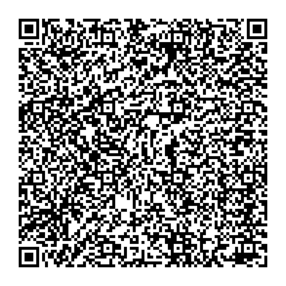

In [0]:
# ============================= FORM ============================= #
#@markdown <h3>⬅️ Click Here to START server</h3>
#@markdown <br><center><img src='https://www.v2ray.com/resources/v2ray_1024.png' height="100" alt="V2Ray"/></center>
#@markdown <center><h3>V2Ray<br />An free and open-source proxy server</h3></center><br>
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
ID=""  # @param {type:"string"}
PORT_FORWARD = "localhost" #@param ["ngrok", "localhost"]
# ================================================================ #

import json
import base64
import uuid
import os
import urllib
import re
from IPython.display import clear_output

HOME = os.path.expanduser("~")
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import PortForward_wrapper

def show_qr(text):
  from subprocess import Popen
  try:
    from MyQR import myqr
  except:
    Popen("pip install myqr".split()).wait()
  Popen(["myqr",text]+"--version 5 --level H -n qrcode.png -d /tmp".split())
  from PIL import Image
  im = Image.open("/tmp/qrcode.png")
  os.remove("/tmp/qrcode.png")
  im.show()
  import matplotlib.pyplot as plt
  plt.figure(figsize=(5,5))
  plt.imshow(im)
  plt.axis('off')
  plt.show()
def v2ray(id=None,port=9999):
  if not os.path.exists("/v2raybin"):
    os.system('mkdir -m 777 /v2raybin  &&  cd /v2raybin  && curl -L -H "Cache-Control: no-cache" -o v2ray.zip https://github.com/v2ray/v2ray-core/releases/latest/download/v2ray-linux-64.zip  && unzip v2ray.zip  && chmod +x /v2raybin/v2ray  && rm -rf v2ray.zip  && chgrp -R 0 /v2raybin  && chmod -R g+rwX /v2raybin')
  CONFIG_JSON1="{\"log\":{\"access\":\"\",\"error\":\"\",\"loglevel\":\"warning\"},\"inbound\":{\"protocol\":\"vmess\",\"port\":"
  CONFIG_JSON2=",\"settings\":{\"clients\":[{\"id\":\""
  CONFIG_JSON3="\",\"alterId\":64}]},\"streamSettings\":{\"network\":\"ws\"}},\"inboundDetour\":[],\"outbound\":{\"protocol\":\"freedom\",\"settings\":{}}}"
  with open("config.json","w") as f:
    f.write(CONFIG_JSON1+str(port)+CONFIG_JSON2+id+CONFIG_JSON3)
  return Popen("/v2raybin/v2ray")
port=9910
if not ID:
  ID=str(uuid.uuid4())
print("Setting up v2ray server ... ")
v2ray(ID,port)
print("Setting up tunnel ... ")
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['v2ray', port, 'http']], 'sa',
    [f"{HOME}/.ngrok2/V2ray.yml", 8097]
).start('v2ray', displayB=False)
d=json.loads('{"add":"{0}","aid":"64","host":"","id":"{1}","net":"ws","path":"","port":"80","ps":"1","tls":"","type":"none","v":"2"}')
d["add"]=re.search("(?<=//).*?(/|$)",Server["url"]).group()
d["id"]=ID
clear_output()
print(d)
config="vmess://"+base64.b64encode(json.dumps(d).encode()).decode("utf-8")
print(config)
show_qr(config)

In [0]:
!npm install node-dev

npm WARN rollup-plugin-babel@4.4.0 requires a peer of rollup@>=0.60.0 <3 but none is installed. You must install peer dependencies yourself.
npm WARN rollup-plugin-commonjs@10.1.0 requires a peer of rollup@>=1.12.0 but none is installed. You must install peer dependencies yourself.
npm WARN rollup-plugin-node-resolve@5.2.0 requires a peer of rollup@>=1.11.0 but none is installed. You must install peer dependencies yourself.

+ node-dev@4.0.0
added 46 packages from 28 contributors in 4.856s


In [0]:
!npm test


> remoteview@2.0.3 test /content/RemoteView
> bash ./test.sh

W: [pulseaudio] main.c: This program is not intended to be run as root (unless --system is specified).
starting http server on port 8003
/content/RemoteView/zombie-lord/launcher.js:1
Error: Cannot find module 'is-docker'
Require stack:
- /content/RemoteView/zombie-lord/launcher.js
- /content/RemoteView/zombie-lord/api.js
- /content/RemoteView/server.js
- /content/RemoteView/index.js
    at Object.<anonymous> (/content/RemoteView/zombie-lord/launcher.js:1)
/content/RemoteView/parec-server/index.js:1
TypeError: "listener" argument must be a function
    at _addListener (events.js:239:11)
    at Server.addListener (events.js:297:10)
    at new Server (_http_server.js:269:10)
    at Proxy.createServer (http.js:34:10)
    at Object.<anonymous> (/content/RemoteView/parec-server/index.js:76:19)
    at Generator.next (<anonymous>)
[ERROR] 08:11:22 Error
kill: (8211): No such process


In [0]:
!git clone https://github.com/dosyago/RemoteView
%cd RemoteView
!./setup_machine.sh
!npm test

In [0]:
from ttmg import LocalhostRun
LocalhostRun(8003).keep_alive()

'a42939e4-5ac6f562.localhost.run'

In [0]:
!apt install pulseaudio

In [0]:
%cd RemoteView
!npm test --system

[Errno 2] No such file or directory: 'RemoteView'
/content/RemoteView

> remoteview@2.0.3 test /content/RemoteView
> bash ./test.sh

E: [pulseaudio] main.c: Failed to kill daemon: No such process
W: [pulseaudio] main.c: This program is not intended to be run as root (unless --system is specified).
./test.sh: line 14: node-dev: command not found
npm ERR! Test failed.  See above for more details.
module.js:549
    throw err;
    ^

Error: Cannot find module 'esm'
    at Function.Module._resolveFilename (module.js:547:15)
    at Function.Module._load (module.js:474:25)
    at Module.require (module.js:596:17)
    at Function.Module._preloadModules (module.js:753:12)
    at preloadModules (bootstrap_node.js:475:38)
    at startup (bootstrap_node.js:188:9)
    at bootstrap_node.js:612:3


## <img src='https://github.com/pyload/pyload-webui/raw/master/media/banner.png' height="60" alt="pyLoad" />

In [0]:
#@markdown <h3>⬅️ Click Here to START server</h3>
#@markdown <br><center><img src='https://github.com/pyload/pyload-webui/raw/master/media/banner.png' height="100" alt="pyLoad"/></center>
#@markdown <center><h3>pyLoad Webinterface<br />The free and open-source Download Manager written in pure Python</h3></center><br>
import os, pathlib, zipfile, re
import urllib.request
from IPython.display import HTML, clear_output

Version = '1.3.0'

#####################################
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
#@markdown Default <br>&emsp;username : admin<br>&emsp;password : admin
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")


from ttmg import (
    updateCheck,
    runSh,
    loadingAn,
    PortForward_wrapper,
    findProcess
)

if updateCheck("Checking updates ...", Version):  # VERSION CHECKING ...
    !kill -9 -1 &
clear_output()
loadingAn()

os.makedirs('downloads', exist_ok=True)
os.makedirs('tools/pyload', exist_ok=True)

# Downloading latest version of pyload
if not os.path.exists("tools/pyload/pyload-stable"):
  urlF = 'https://github.com/pyload/pyload/archive/stable.zip'
  conf = 'https://raw.githubusercontent.com/biplobsd/' \
          'Google-Colab-CloudTorrent/beta/res/pyload/pyload.conf'
  db = 'https://github.com/biplobsd/Google-Colab-CloudTorrent/raw/master/' \
        'res/pyload/files.db'
  urllib.request.urlretrieve(urlF, 'tools/pyload.zip')
  urllib.request.urlretrieve(conf, 'tools/pyload/pyload.conf')
  urllib.request.urlretrieve(db, 'tools/pyload/files.db')
  with zipfile.ZipFile('tools/pyload.zip', 'r') as zip_ref:
      zip_ref.extractall('tools/pyload')
  try:
    pathlib.Path('tools/pyload.zip').unlink()
  except FileNotFoundError:
    pass

  runSh("apt install python-pycurl python-qt4 tesseract-ocr libtesseract-dev")
  runSh("pip2 install pycrypto pyOpenSSL Jinja2 tesseract tesseract-ocr")

if not findProcess("python2.7", "pyLoadCore.py"):
  runCmd = "python2.7 /content/tools/pyload/pyload-stable/pyLoadCore.py" \
          " --configdir=/content/tools/pyload" \
          " --no-remote" \
          " --daemon"
  runSh(runCmd, shell=True)
# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "localhost" #@param ["ngrok", "localhost"]
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['rcloneConfig', 53682, 'http'], 
                            ['pyload', 8000, 'http']], 'sa', 
    [f"{HOME}/.ngrok2/rclonePyload.yml", 4074]
).start('pyload')

## <img src='https://raw.githubusercontent.com/biplobsd/Google-Colab-CloudTorrent/master/src/spotify-downloader.png' height="25" alt="spotify-downloader" /> spotify-downloader

In [0]:
#@markdown <br><center><img src='https://raw.githubusercontent.com/biplobsd/Google-Colab-CloudTorrent/master/src/spotify-downloader.png' height="100" alt="spotify-downloader"/></center>
#@markdown <center><h3>spotify-downloader<br />Download Spotify playlists from YouTube with albumart and meta-tags</h3></center><br>

import os, uuid, urllib.parse, re
import ipywidgets as widgets

from glob import glob
from urllib.parse import urlparse, parse_qs
from IPython.display import HTML, clear_output, YouTubeVideo
from IPython.utils.io import ask_yes_no
from google.colab import output, files


os.makedirs('tools/spotify-downloader/', exist_ok=True)
os.makedirs('downloads', exist_ok=True)

# # Config files
# data = """spotify-downloader:
#   avconv: false
#   download-only-metadata: false
#   dry-run: false
#   file-format: '{artist} - {track_name}'
#   folder: /home/user/Music
#   input-ext: .m4a
#   log-level: INFO
#   manual: false
#   music-videos-only: false
#   no-fallback-metadata: false
#   no-metadata: false
#   no-spaces: false
#   output-ext: .mp3
#   overwrite: prompt
#   search-format: '{artist} - {track_name} lyrics'
#   skip: null
#   spotify_client_id: 4fe3fecfe5334023a1472516cc99d805
#   spotify_client_secret: 0f02b7c483c04257984695007a4a8d5c
#   trim-silence: false
#   write-successful: null
#   write-to: null
#   youtube-api-key: null
# """
# with open('tools/spotify-downloader/config.yml', 'w') as wnow:
#   wnow.write(data)

Links = widgets.Textarea(placeholder='''Link list
(one link per line)''')

fileFormat = widgets.Text(
    value='{artist} - {track_name}',
    placeholder='File name format',
    description="""File Name : file format to save the downloaded track with, each
                        tag is surrounded by curly braces. Possible formats:
                        ['track_name', 'artist', 'album', 'album_artist',
                        'genre', 'disc_number', 'duration', 'year',
                        'original_date', 'track_number', 'total_tracks',
                        'isrc']""",
    disabled=False
)

searchFormat = widgets.Text(
    value='{artist} - {track_name} lyrics',
    placeholder='Search format',
    description="""Search Format : search format to search for on YouTube, each tag is
                        surrounded by curly braces. Possible formats:
                        ['track_name', 'artist', 'album', 'album_artist',
                        'genre', 'disc_number', 'duration', 'year',
                        'original_date', 'track_number', 'total_tracks',
                        'isrc']""",
    disabled=False
)

tab = widgets.Tab()

LinksType = widgets.RadioButtons(
    options=['Songs', 'Playlist', 'Album', 'Username', 'Artist'],
    value='Songs',
    layout={'width': 'max-content'},
    description='Links type:',
    disabled=False,
)

SavePathYT = widgets.Dropdown(options=["/content/downloads", "/content"])

Extension = widgets.Select(options=["aac", "flac", "mp3", "m4a", "opus", "vorbis", "wav"], value="mp3")

TrimSilence = widgets.ToggleButton(
    value=False,
    description='Trim silence',
    disabled=False,
    button_style='',
    tooltip='remove silence from the start of the audio',
    icon='check'
)

writeM3u = widgets.ToggleButton(
    value=False,
    description='Write .m3u playlist',
    disabled=False,
    button_style='',
    tooltip='''generate an .m3u playlist file with youtube links
               given a text file containing tracks''',
    icon='check'
)

noMeta = widgets.ToggleButton(
    value=False,
    description='No metadata',
    disabled=False,
    button_style='',
    tooltip='do not embed metadata in tracks',
    icon='check'
)

nf = widgets.ToggleButton(
    value=False,
    description='No fallback metadata',
    disabled=False,
    button_style='',
    tooltip='''do not use YouTube as fallback for metadata if track
                        not found on Spotify''',
    icon='check'
)

dryRun = widgets.ToggleButton(
    value=False,
    description='Dry run',
    disabled=False,
    button_style='',
    tooltip=''' show only track title and YouTube URL, and then skip
                        to the next track (if any)''',
    icon='check'
)

MusicVidOnly = widgets.ToggleButton(
    value=False,
    description='Music Videos Only',
    disabled=False,
    button_style='',
    tooltip='''search only for music videos on Youtube (works only
                        when YouTube API key is set''',
    icon='check'
)

NoSpaces = widgets.ToggleButton(
    value=False,
    description='No Spaces',
    disabled=False,
    button_style='',
    tooltip='''replace spaces with underscores in file names''',
    icon='check'
)

manual = widgets.ToggleButton(
    value=False,
    description='manually',
    disabled=False,
    button_style='',
    tooltip='''choose the track to download manually from a list of
                        matching tracks''',
    icon='check'
)

nr = widgets.ToggleButton(
    value=False,
    description='Keep original',
    disabled=False,
    button_style='',
    tooltip='''do not remove the original file after conversion''',
    icon='check'
)

ExtraArg = widgets.Text(placeholder="Extra Arguments")

class MakeButton(object):
  def __init__(self, title, callback, style):
    self._title = title
    self._callback = callback
    self._style = style
  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)
    if self._style != "":
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button mod-" + self._style
    else:
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button"
    template = """<button class="{style_html}" id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id, style_html=style_html)
    return html
  
def MakeLabel(description, button_style):
  return widgets.Button(description=description, disabled=True, button_style=button_style)

def RefreshPathYT():
  if os.path.exists("/content/drive/"):
    if os.path.exists("/content/drive/Shared drives/"):
      SavePathYT.options = ["/content", "/content/downloads", "/content/drive/My Drive"] + glob("/content/drive/My Drive/*/") + glob("/content/drive/Shared drives/*/")
    else:
      SavePathYT.options = ["/content", "/content/downloads", "/content/drive/My Drive"] + glob("/content/drive/My Drive/*/")
  else:
    SavePathYT.options = ["/content/downloads", "/content"]


def ShowYT():
  clear_output(wait=True)
  RefreshPathYT()
  mainTab = widgets.Box([widgets.HBox([widgets.VBox([widgets.HTML("<b style=\"color:#888888;\">Link:</b>"), Links,
                                      LinksType, searchFormat, fileFormat, widgets.HBox([TrimSilence, writeM3u, noMeta]), widgets.HBox([nf, dryRun, MusicVidOnly]),widgets.HBox([NoSpaces, manual, nr])]),
                        widgets.VBox([widgets.HTML("<b style=\"color:#888888;\">Extension:</b>"), Extension,
                                      widgets.HTML("<b style=\"color:#888888;\">Extra Arguments:</b>"), ExtraArg])])])
  tab.children = [mainTab]
  tab.set_title(0, 'spotify-downloader')
  display(tab)
  display(HTML("<h4 style=\"color:#888888;\">Save Location:</h4>"), SavePathYT, MakeButton("Refresh", RefreshPathYT, ""))
  if not os.path.exists("/content/drive/"):
    display(HTML("*If you want to save in Google Drive please run the cell below."))
  display(HTML("<br>"), MakeButton("Download", DownloadYT, "info"))

def DownloadYT():
  if Links.value.strip():
    Count = 0
    Total = str(len(Links.value.splitlines()))
    if writeM3u.value:
      M3u = '--write-m3u'
    else:
      M3u = ''
    if TrimSilence.value:
      trmS = '--trim-silence'
    else:
      trmS = ''
    if noMeta.value:
      noM = '--no-metadata'
    else:
      noM = ''
    if nf.value:
      nfv = '--no-fallback-metadata'
    else:
      nfv = ''
    if dryRun.value:
      drR = '--dry-run'
    else:
      drR = ''
    if MusicVidOnly.value:
      MsV = '--music-videos-only'
    else:
      MsV = ''
    if NoSpaces.value:
      NoS = '--no-spaces'
    else:
      NoS = ''
    if manual.value:
      mal = '--manual'
    else:
      mal = ''
    if nr.value:
      nro = '--no-remove-original' 
    else:
      nro = ''
    if not searchFormat.value == '{artist} - {track_name} lyrics':
      seFor = f'--search-format "{searchFormat.value}"'
    else:
      seFor = ''
    if not fileFormat.value == '{artist} - {track_name}':
      fiFor = f'--file-format "{fileFormat.value}"'
    else:
      fiFor = ''
    
    if not LinksType.value == 'Songs':
      with open('tools/spotify-downloader/finish.txt', 'a+') as master:
        for Link in Links.value.splitlines():
          if LinksType.value == 'Playlist':
            outFileName = !spotdl --playlist $Link
          elif LinksType.value == 'Album':
            outFileName = !spotdl --album $Link
          elif LinksType.value == 'Username':
            outFileName = !spotdl -u $Link
          elif LinksType.value == 'Artist':
            outFileName = !spotdl --all-albums $Link
          filename = re.search(r"to\s(.+\.txt)", outFileName[-1]).group(1)
          with open(filename, 'r') as r:
            master.write(r.read())
    else:
      for Link in Links.value.splitlines():
        with open('tools/spotify-downloader/finish.txt', 'w') as master:
          master.write(Link)
    # Extra Arguments
    
    extraargC = ExtraArg.value
    cmd = r"spotdl -l 'tools/spotify-downloader/finish.txt' " \
      fr"-f {SavePathYT.value} " \
      fr"-o .{Extension.value} " \
      f"--overwrite skip " \
      f"{seFor} {fiFor} " \
      f"{M3u} {trmS} {noM} {nfv} {drR} {MsV} {NoS} {mal} {nro}" 
    !$cmd
    ShowYT()

if not os.path.isfile("/usr/local/bin/spotdl"):
  get_ipython().system_raw("pip3 install spotdl && apt-get install ffmpeg")

ShowYT()

## <img src='http://pic2.orsoon.com/2017/0719/20170719091439708.png' height="60" alt="aria2" />___aria2___

In [0]:
#@markdown <h3>⬅️ Click Here to START server</h3>
#@markdown <br><center><img src='http://pic2.orsoon.com/2017/0719/20170719091439708.png' height="200" alt="aria2"/></center>
#@markdown <center><h3>aria2<br />The next generation download utility.</h3></center><br>
import os, pathlib, zipfile, re
import urllib.request
from IPython.display import HTML, clear_output

Version = '1.3.0'

#####################################
USE_FREE_TOKEN = True  # @param {type:"boolean"}
# Aria2 Service
Aria2_rpc = True  # @param {type:"boolean"}
Ariang_WEBUI = True  # @param {type:"boolean"}

TOKEN = ""  # @param {type:"string"}
# OUTPUT_DIR = ""  # @param {type:"string"}
PORT = 8221
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")


from ttmg import (
    updateCheck,
    runSh,
    loadingAn,
    PortForward_wrapper,
    CWD,
    displayUrl,
    findProcess
)

if updateCheck("Checking updates ...", Version):  # VERSION CHECKING ...
    !kill -9 -1 &
clear_output()
loadingAn()

# Ariang SETUP
runSh('sudo apt install -y aria2')
pathlib.Path('ariang').mkdir(mode=0o777, exist_ok=True)
pathlib.Path('downloads').mkdir(mode=0o777, exist_ok=True)

# github latest releases tag define
def latestTag(link):
  import re
  from urllib.request import urlopen
  htmlF = urlopen(link+"/releases/latest").read().decode('UTF-8')
  return re.findall(r'.+\/tag\/([.0-9A-Za-z]+)".+/', htmlF)[0]

# Downloading latest version of ariang
if not os.path.exists("ariang/index.html"):
  BASE_URL = r"https://github.com/mayswind/AriaNg"
  LATEST_TAG = latestTag(BASE_URL)
  urlF = f'{BASE_URL}/releases/download/{LATEST_TAG}/' \
              f'AriaNg-{LATEST_TAG}-AllInOne.zip'
  urllib.request.urlretrieve(urlF, 'ariang/new.zip')
  with zipfile.ZipFile('ariang/new.zip', 'r') as zip_ref:
      zip_ref.extractall('ariang')
  try:
    pathlib.Path('ariang/new.zip').unlink()
  except FileNotFoundError:
    pass

# START_ARIANG_WEBUI_AND_ARIA2_RPC
try:
  if not OUTPUT_DIR:
    OUTPUT_DIR = f"downloads/"
  elif not os.path.exists(OUTPUT_DIR):
    clear_output()
    print("Error: Your set path not found! Create path!")
    exx()
except:
  OUTPUT_DIR = f"{CWD}/downloads/"
if Aria2_rpc:
  if not findProcess("aria2c", "--enable-rpc"):
    try:
      trackers = urllib.request.urlopen(
          "https://trackerslist.com/best_aria2.txt"
      ).read().decode()
      cmdC = r"aria2c --enable-rpc --rpc-listen-port=6800 -D " \
            fr"-d {OUTPUT_DIR} " \
            r"-j 20 " \
            r"-c " \
            fr"--bt-tracker={trackers} " \
            r"--bt-request-peer-speed-limit=0 " \
            r"--bt-max-peers=0 " \
            r"--seed-ratio=0.0 " \
            r"--max-connection-per-server=10 " \
            r"--min-split-size=10M " \
            r"--follow-torrent=mem " \
            r" &"
      runSh(
          cmdC,
          shell=True
      )
    except:
      print("aria2 rpc not enabling. Try again later!")

# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "localhost" #@param ["ngrok", "localhost"]
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['Aria2_rpc', 6800, 'http'], 
    ['Ariang', 8221, 'http']], 'jp', 
    [f"{HOME}/.ngrok2/aria2.yml", 5042]
)
if Aria2_rpc:
  data = Server.start('Aria2_rpc', displayB=False)
  Host = data['url'][7:] 
  port = "80"
  clear_output()
if Ariang_WEBUI:
  if Aria2_rpc:
    filePath = 'ariang/index.html'
    with open(filePath, 'r+') as f:
      read_data = f.read()
      f.seek(0)
      f.truncate(0)
      read_data = re.sub(r'(rpcHost:"\w+.")|rpcHost:""', 
                        f'rpcHost:"{Host}"', read_data)
      read_data = re.sub(r'protocol:"\w+."', r'protocol:"ws"', read_data)
      read_data = re.sub(r'rpcPort:"\d+."', f'rpcPort:"{port}"', read_data)
      f.write(read_data)
  try:
    urllib.request.urlopen(f"http://localhost:{PORT}")
  except:
    runSh(f"python3 -m http.server {PORT} &", shell=True, cd="ariang/")
 
  data2 = Server.start('Ariang', displayB=False)
  displayUrl(data2, pNamU='Ariang : ')

if Aria2_rpc:
  display(HTML("""<style>@import url('https://fonts.googleapis.com/css?family=Source+Code+Pro:200,900');  :root {   --text-color: hsla(210, 50%, 85%, 1);   --shadow-color: hsla(210, 40%, 52%, .4);   --btn-color: hsl(210, 80%, 42%);   --bg-color: #141218; }  * {   box-sizing: border-box; } button { position:relative; padding: 10px 20px;     border: none;   background: none;      font-family: "Source Code Pro";   font-weight: 900;font-size: 100%;     color: var(--text-color);      background-color: var(--btn-color);   box-shadow: var(--shadow-color) 2px 2px 22px;   border-radius: 4px;    z-index: 0;overflow: hidden; -webkit-user-select: text;-moz-user-select: text;-ms-user-select: text;user-select: text;}  button:focus {   outline-color: transparent;   box-shadow: var(--btn-color) 2px 2px 22px; }  .right::after, button::after {   content: var(--content);   display: block;   position: absolute;   white-space: nowrap;   padding: 40px 40px;   pointer-events:none; }  button::after{   font-weight: 200;   top: -30px;   left: -20px; }   .right, .left {   position: absolute;   width: 100%;   height: 100%;   top: 0; } .right {   left: 66%; } .left {   right: 66%; } .right::after {   top: -30px;   left: calc(-66% - 20px);      background-color: var(--bg-color);   color:transparent;   transition: transform .4s ease-out;   transform: translate(0, -90%) rotate(0deg) }  button:hover .right::after {   transform: translate(0, -47%) rotate(0deg) }  button .right:hover::after {   transform: translate(0, -50%) rotate(-7deg) }  button .left:hover ~ .right::after {   transform: translate(0, -50%) rotate(7deg) }  /* bubbles */ button::before {   content: '';   pointer-events: none;   opacity: .6;   background:     radial-gradient(circle at 20% 35%,  transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 75% 44%, transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 46% 52%, transparent 0, transparent 4px, var(--text-color) 5px, var(--text-color) 6px, transparent 6px);    width: 100%;   height: 300%;   top: 0;   left: 0;   position: absolute;   animation: bubbles 5s linear infinite both; }  @keyframes bubbles {   from {     transform: translate();   }   to {     transform: translate(0, -66.666%);   } }.zui-table {    border: solid 1px #DDEEEE;    border-collapse: collapse;    border-spacing: 0;    font: normal 13px;}.zui-table thead th {    background-color: #DDEFEF;    border: solid 1px #DDEEEE;    color: #0000009e;    padding: 10px;    text-align: left;}.zui-table tbody td {border: solid 1px #effff97a;color: #ffffffd1;    padding: 10px;}</style><center><button><table class="zui-table blueBG"><p>Aria2 rpc config<p><thead>        <tr>            <th>Protocol</th>            <th>Host</th>            <th>Port</th>        </tr>    </thead>    <tbody>        <tr>            <td>WebSocket</td><td>"""+Host+"""</td><td>"""+port+"""</td></tr></tbody></table><a target="_blank" style="text-decoration: none;color: hsla(210, 50%, 85%, 1);font-size: 10px;" href="http://bit.ly/2qoOw0a">NB. How to setup this's config. [Click ME]</a></button><center>"""))


## <img src='https://raw.githubusercontent.com/biplobsd/Google-Colab-CloudTorrent/master/src/aria2cli.png' height="45" alt="aira2"/> <font size=1px >___Direct link downloader___</font>

___Auto share link supported : Disk.yandex.com, Gdrive and youtube-dl all extractor...___

In [0]:
URL = "" #@param {type:"string"}
#@markdown <center><h5>Default output path /content/downloads/</h5></center>
OUTPUT_PATH = "" #@param {type:"string"}

import pathlib
import shutil
import hashlib
import requests
from urllib.parse import urlparse
from os import path, mkdir
if not path.exists("/root/.ipython/ttmg.py"): 
    from subprocess import run
    from shlex import split

    shellCmd = "wget -qq https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py \
                    -O /root/.ipython/ttmg.py"
    run(split(shellCmd))
from ttmg import updateCheck, runSh

def youtubedlInstall():
  if not path.isfile("/usr/local/bin/youtube-dl"):
    cmdC = "rm -rf /content/sample_data/ && " \
            " mkdir -p -m 666 /root/.YouTube-DL/ &&" \
            " apt-get install atomicparsley &&" \
            " curl -L https://yt-dl.org/downloads/latest/youtube-dl " \
            "-o /usr/local/bin/youtube-dl &&" \
            " chmod a+rx /usr/local/bin/youtube-dl"
    get_ipython().system_raw(cmdC)

def aria2Install():
  runSh('apt install -y aria2')

def istmd(URL): 
  link = urlparse(URL)
    
  #YandexDisk
  if link.netloc == "yadi.sk":
    API_ENDPOINT = 'https://cloud-api.yandex.net/v1/disk/public/resources/' \
                    '?public_key={}&path=/{}&offset={}'
    dry = False
    def md5sum(file_path):
        md5 = hashlib.md5()
        with open(file_path, 'rb') as f:
            for chunk in iter(lambda: f.read(128 * md5.block_size), b''):
                md5.update(chunk)
        return md5.hexdigest()


    def check_and_download_file(target_path, url, size, checksum):
        if path.isfile(target_path):
            if size == path.getsize(target_path):
                if checksum == md5sum(target_path):
                    print('URL {}'.format(url))
                    print('skipping correct {}'.format(target_path))
                    return
        if not dry:
            print('URL {}'.format(url))
            print('downloading {}'.format(target_path))
            runSh(f'aria2c -x 16 -s 16 -k 1M -d {OUTPUT_PATH} {url}', output=True)
            # r = requests.get(url, stream=True)
            # with open(target_path, 'wb') as f:
            #     shutil.copyfileobj(r.raw, f)


    def download_path(target_path, public_key, source_path, offset=0):
        print('getting "{}" at offset {}'.format(source_path, offset))
        current_path = path.join(target_path, source_path)
        pathlib.Path(current_path).mkdir(parents=True, exist_ok=True)
        jsn = requests.get(API_ENDPOINT.format(public_key, source_path, offset)).json()
        def try_as_file(j):
            if 'file' in j:
                file_save_path = path.join(current_path, j['name'])
                check_and_download_file(file_save_path, j['file'], j['size'], j['md5'])
                return True
            return False

        # first try to treat the actual json as a single file description
        if try_as_file(jsn):
            return

        # otherwise treat it as a directory
        emb = jsn['_embedded']
        items = emb['items']
        for i in items:
            # each item can be a file...
            if try_as_file(i):
                continue
            # ... or a directory
            else:
                subdir_path = path.join(source_path, i['name'])
                download_path(target_path, public_key, subdir_path)

        # check if current directory has more items
        last = offset + emb['limit']
        if last < emb['total']:
            download_path(target_path, public_key, source_path, last)
    download_path(OUTPUT_PATH, URL, '')
    return False  
  return URL

if not OUTPUT_PATH:
  OUTPUT_PATH = "/content/downloads/"
  
if not URL == "":
  aria2Install()
  youtubedlInstall()
  try:
    mkdir("downloads")
  except FileExistsError:
    pass
  url = istmd(URL)
  if url != False:
    print('URL {}'.format(URL))
    cmdC = f'youtube-dl -o "{OUTPUT_PATH}/%(title)s" {URL} ' \
            '--external-downloader aria2c ' \
            '--external-downloader-args "-x 16 -s 16 -k 1M"'
    runSh(cmdC, output=True)
else:
  print("Please input url")

## <img src='https://biplobsd.github.io/RLabClone/img/title_jdownloader.png' height="45" alt="JDownloader"/>

In [0]:
# ============================= FORM ============================= #
# @markdown #### ⬅️ Execute JDownloader
NEW_Account = True  # @param {type:"boolean"}
# ================================================================ #

from os import path as _p

if not _p.exists("/root/.ipython/rlab_utils.py"):
    from shlex import split as _spl
    from subprocess import run  # nosec

    shellCmd = "wget -qq https://biplobsd.github.io/RLabClone/res/rlab_utils.py \
                    -O /root/.ipython/rlab_utils.py"
    run(_spl(shellCmd))  # nosec

from rlab_utils import handleJDLogin

handleJDLogin(NEW_Account)

## <img src='https://biplobsd.github.io/RLabClone/img/title_youtube-dl.png' height="45" alt="Youtube-DL"/>

In [0]:
# ============================= FORM ============================= #
# @markdown #### ⬅️ Execute YouTube-DL
# @markdown 📝 Note: if you want to change an archive file just run this cell again.
Archive = False #@param {type:"boolean"}
# ================================================================ #

import os, uuid, urllib.parse
import ipywidgets as widgets

from glob import glob
from urllib.parse import urlparse, parse_qs
from IPython.display import HTML, clear_output, YouTubeVideo
from IPython.utils.io import ask_yes_no
from google.colab import output, files

Links = widgets.Textarea(placeholder='''Video/Playlist Link
(one link per line)''')

VideoQ = widgets.Dropdown(options=["Best Quality (VP9 upto 4K)", "Best Compatibility (H.264 upto 1080p)"])

AudioQ = widgets.Dropdown(options=["Best Quality (Opus)", "Best Compatibility (M4A)"])

Subtitle = widgets.ToggleButton(value=True, description="Subtitle", button_style="info", tooltip="Subtitle")

SavePathYT = widgets.Dropdown(options=["/content", "/content/Downloads"])

AudioOnly = widgets.ToggleButton(value=False, description="Audio Only", button_style="", tooltip="Audio Only")

Resolution = widgets.Select(options=["Highest", "4K", "1440p", "1080p", "720p", "480p", "360p", "240p", "144p"], value="Highest")

Extension = widgets.Select(options=["mkv", "webm"], value="mkv")

UsernameYT = widgets.Text(placeholder="Username")

PasswordYT = widgets.Text(placeholder="Password")

SecAuth = widgets.Text(placeholder="2nd Factor Authentication")

VideoPW = widgets.Text(placeholder="Video Password")

GEOBypass = widgets.Dropdown(options=["Disable", "Hide", "AD", "AE", "AF", "AG", "AI", "AL", "AM", "AO", "AQ", "AR", "AS", "AT", "AU", "AW", "AX", "AZ", "BA", "BB", "BD", "BE", "BF", "BG", "BH", "BI", "BJ", "BL", "BM", "BN", "BO", "BQ", "BR", "BS", "BT", "BV", "BW", "BY", "BZ", "CA", "CC", "CD", "CF", "CG", "CH", "CI", "CK", "CL", "CM", "CN", "CO", "CR", "CU", "CV", "CW", "CX", "CY", "CZ", "DE", "DJ", "DK", "DM", "DO", "DZ", "EC", "EE", "EG", "EH", "ER", "ES", "ET", "FI", "FJ", "FK", "FM", "FO", "FR", "GA", "GB", "GD", "GE", "GF", "GG", "GH", "GI", "GL", "GM", "GN", "GP", "GQ", "GR", "GS", "GT", "GU", "GW", "GY", "HK", "HM", "HN", "HR", "HT", "HU", "ID", "IE", "IL", "IM", "IN", "IO", "IQ", "IR", "IS", "IT", "JE", "JM", "JO", "JP", "KE", "KG", "KH", "KI", "KM", "KN", "KP", "KR", "KW", "KY", "KZ", "LA", "LB", "LC", "LI", "LK", "LR", "LS", "LT", "LU", "LV", "LY", "MA", "MC", "MD", "ME", "MF", "MG", "MH", "MK", "ML", "MM", "MN", "MO", "MP", "MQ", "MR", "MS", "MT", "MU", "MV", "MW", "MX", "MY", "MZ", "NA", "NC", "NE", "NF", "NG", "NI", "NL", "NO", "NP", "NR", "NU", "NZ", "OM", "PA", "PE", "PF", "PG", "PH", "PK", "PL", "PM", "PN", "PR", "PS", "PT", "PW", "PY", "QA", "RE", "RO", "RS", "RU", "RW", "SA", "SB", "SC", "SD", "SE", "SG", "SH", "SI", "SJ", "SK", "SL", "SM", "SN", "SO", "SR", "SS", "ST", "SV", "SX", "SY", "SZ", "TC", "TD", "TF", "TG", "TH", "TJ", "TK", "TL", "TM", "TN", "TO", "TR", "TT", "TV", "TW", "TZ", "UA", "UG", "UM", "US", "UY", "UZ", "VA", "VC", "VE", "VG", "VI", "VN", "VU", "WF", "WS", "YE", "YT", "ZA", "ZM", "ZW"])

ProxyYT = widgets.Text(placeholder="Proxy URL")

MinSleep = widgets.BoundedIntText(value=0, min=0, max=300, step=1, description="Min:")

MaxSleep = widgets.BoundedIntText(value=0, min=0, max=300, step=1, description="Max:")

ExtraArg = widgets.Text(placeholder="Extra Arguments")

class MakeButton(object):
  def __init__(self, title, callback, style):
    self._title = title
    self._callback = callback
    self._style = style
  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)
    if self._style != "":
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button mod-" + self._style
    else:
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button"
    template = """<button class="{style_html}" id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id, style_html=style_html)
    return html
  
def MakeLabel(description, button_style):
  return widgets.Button(description=description, disabled=True, button_style=button_style)

def upload_archive():
  if ask_yes_no("Do you already have an archive file? (y/n)", default="", interrupt=""):
    try:
      display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Please upload an archive from your computer.</h2><br>"))
      UploadConfig = files.upload().keys()
      clear_output(wait=True)
      if len(UploadConfig) == 0:
        return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">File upload has been cancelled during upload file.</h2><br></center>"))
      elif len(UploadConfig) == 1:
        for fn in UploadConfig:
          if os.path.isfile("/content/" + fn):
            get_ipython().system_raw("mv -f " + "\"" + fn + "\" /root/.youtube-dl.txt && chmod 666 /root/.youtube-dl.txt")
            AudioOnly.observe(AudioOnlyChange)
            Subtitle.observe(SubtitleChange)
            AudioQ.observe(AudioQChange)
            ShowYT()
          else:
            return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">File upload has been failed during upload file.</h2><br></center>"))
      else:
        for fn in UploadConfig:
          get_ipython().system_raw("rm -f " + "\"" + fn + "\"")
        return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">Please uploading only one file at a time.</h2><br></center>"))
    except:
      clear_output(wait=True)
      return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">Error occurred during upload file.</h2><br></center>"))
  else:
    get_ipython().system_raw("touch '/root/.youtube-dl.txt'")
    AudioOnly.observe(AudioOnlyChange)
    Subtitle.observe(SubtitleChange)
    AudioQ.observe(AudioQChange)
    ShowYT()

def RefreshPathYT():
  if os.path.exists("/content/drive/"):
    if os.path.exists("/content/drive/Shared drives/"):
      SavePathYT.options = ["/content", "/content/Downloads", "/content/drive/My Drive"] + glob("/content/drive/My Drive/*/") + glob("/content/drive/Shared drives/*/")
    else:
      SavePathYT.options = ["/content", "/content/Downloads", "/content/drive/My Drive"] + glob("/content/drive/My Drive/*/")
  else:
    SavePathYT.options = ["/content", "/content/Downloads"]

def AudioOnlyChange(change):
  if change["type"] == "change" and change["new"]:
    VideoQ.disabled = True
    Subtitle.disabled = True
    if Subtitle.value:
      Subtitle.button_style = "info"
    else:
      Subtitle.button_style = ""
    Resolution.disabled = True
    Extension.options = ["best", "aac", "flac", "mp3", "m4a", "opus", "vorbis", "wav"]
    Extension.value = "best"
    AudioOnly.button_style = "info"
  elif change["type"] == "change" and change["new"] == False:
    VideoQ.disabled = False
    Subtitle.disabled = False
    if Subtitle.value:
      Subtitle.button_style = "info"
    else:
      Subtitle.button_style = ""
    Resolution.disabled = False
    if AudioQ.value == "Best Quality (Opus)":
      Extension.options = ["mkv", "webm"]
    else:
      Extension.options = ["mkv", "mp4", "webm"]
    Extension.value = "mkv"
    AudioOnly.button_style = ""

def SubtitleChange(change):
  if change["type"] == "change" and change["new"]:
    Subtitle.button_style = "info"
  elif change["type"] == "change" and change["new"] == False:
    Subtitle.button_style = ""

def AudioQChange(change):
  if change["type"] == "change" and change["new"] == "Best Quality (Opus)":
    Extension.options = ["mkv", "webm"]
    Extension.value = "mkv"
  elif change["type"] == "change" and change["new"] == "Best Compatibility (M4A)":
    Extension.options = ["mkv", "mp4", "webm"]
    Extension.value = "mkv"

def ShowYT():
  clear_output(wait=True)
  RefreshPathYT()
  display(widgets.HBox([widgets.VBox([widgets.HTML("<b style=\"color:#888888;\">Link:</b>"), Links,
                                      widgets.HTML("<b style=\"color:#888888;\">For website that require an account:</b>"), UsernameYT, PasswordYT, SecAuth, VideoPW,
                                      widgets.HTML("<b><a href=\"https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2#Officially_assigned_code_elements\" target=\"_blank\">GEO Bypass Country:</a></b>"), GEOBypass,
                                      widgets.HTML("<b style=\"color:#888888;\">Proxy:</b>"), ProxyYT,
                                      widgets.HTML("<b style=\"color:#888888;\">Sleep Interval (second):</b>"), MinSleep, MaxSleep]),
                        widgets.VBox([widgets.HTML("<b style=\"color:#888888;\">Video Quality:</b>"), VideoQ, widgets.HTML("<b style=\"color:#888888;\">Resolution:</b>"), Resolution,
                                      widgets.HTML("<b style=\"color:#888888;\">Audio Quality:</b>"), AudioQ, widgets.HTML("<b style=\"color:#888888;\">Extension:</b>"), Extension,
                                      widgets.HTML("<b style=\"color:#888888;\">Extra Options:</b>"), widgets.HBox([Subtitle, AudioOnly]),
                                      widgets.HTML("<b style=\"color:#888888;\">Extra Arguments:</b>"), ExtraArg])]), HTML("<h4 style=\"color:#888888;\">Save Location:</h4>"),
          SavePathYT, MakeButton("Refresh", RefreshPathYT, ""))
  if not os.path.exists("/content/drive/"):
    display(HTML("*If you want to save in Google Drive please run the cell below."))
  display(HTML("<br>"), MakeButton("Download", DownloadYT, "info"))

def DownloadYT():
  if Links.value.strip():
    Count = 0
    Total = str(len(Links.value.splitlines()))
    # Account Check
    if UsernameYT.value.strip() and PasswordYT.value.strip():
      accountC = "--username \"" + UsernameYT.value + "\" --password \"" + PasswordYT.value + "\""
    else:
      accountC = ""
    if SecAuth.value.strip():
      secauthC = "-2 " + SecAuth.value
    else:
      secauthC = ""
    if VideoPW.value.strip():
      videopwC = "--video-password " + VideoPW.value
    else:
      videopwC = ""
    # Proxy
    if ProxyYT.value.strip():
      proxyytC = "--proxy " + ProxyYT.value
    else:
      proxyytC = ""
    # GEO Bypass
    if GEOBypass.value == "Disable":
      geobypass = ""
    elif GEOBypass.value == "Hide":
      geobypass = "--geo-bypass"
    else:
      geobypass = "--geo-bypass-country " + GEOBypass.value
    # Video Quality
    if VideoQ.value == "Best Quality (VP9 upto 4K)":
      videoqC = "webm"
    else:
      videoqC = "mp4"
    # Audio Quality
    if AudioQ.value == "Best Quality (Opus)":
      audioqC = "webm"
    else:
      audioqC = "m4a"
    # Audio Only Check
    if AudioOnly.value:
      subtitleC = ""
      thumbnailC = ""
      extC = "-x --audio-quality 0 --audio-format " + Extension.value
      codecC = "bestaudio[ext=" + audioqC + "]/bestaudio/best"
    else:
      if Subtitle.value:
        subtitleC = "--all-subs --convert-subs srt --embed-subs"
      else:
        subtitleC = ""
      if Extension.value == "mp4":
        thumbnailC = "--embed-thumbnail"
      else:
        thumbnailC = ""
      extC = "--merge-output-format " + Extension.value
      if Resolution.value == "Highest":
        codecC = "bestvideo[ext=" + videoqC + "]+bestaudio[ext=" + audioqC + "]/bestvideo+bestaudio/best"
      else:
        codecC = "bestvideo[ext=" + videoqC + ",height<=" + Resolution.value.replace("4K", "2160").replace("p", "") + "]+bestaudio[ext=" + audioqC + "]/bestvideo[height<=" + Resolution.value.replace("4K", "2160").replace("p", "") + "]+bestaudio/bestvideo+bestaudio/best"
    # Archive
    if os.path.isfile("/root/.youtube-dl.txt"):
      archiveC = "--download-archive \"/root/.youtube-dl.txt\""
    else:
      archiveC = ""
    # Sleep Interval
    if MinSleep.value > 0 and MaxSleep.value > 0:
      minsleepC = "--min-sleep-interval " + MinSleep.value
      maxsleepC = "--max-sleep-interval " + MaxSleep.value
    else:
      minsleepC = ""
      maxsleepC = ""
    # Extra Arguments
    extraargC = ExtraArg.value
    for Link in Links.value.splitlines():
      clear_output(wait=True)
      Count += 1
      display(HTML("<h3 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Processing link " + str(Count) + " out of " + Total + "</h3>"))
      if "youtube.com" in Link or "youtu.be" in Link:
        display(HTML("<h3 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Currently downloading...</h3><br>"), YouTubeVideo(Link, width=640, height=360), HTML("<br>"))
      else:
        display(HTML("<h3 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Currently downloading <a href=\"" + Link + "\">" + Link + "</a></h3><br>"))
      if ("youtube.com" in Link or "youtu.be" in Link) and "list=" in Link:
        !youtube-dl -i --no-warnings --yes-playlist --add-metadata $accountC $secauthC $videopwC $minsleepC $maxsleepC $geobypass $proxyytC $extC $thumbnailC $subtitleC $archiveC $extraargC -f "$codecC" -o "/root/.YouTube-DL/%(playlist)s/%(playlist_index)s - %(title)s.%(ext)s" "$Link"
      else:
        !youtube-dl -i --no-warnings --yes-playlist --add-metadata $accountC $secauthC $videopwC $minsleepC $maxsleepC $geobypass $proxyytC $extC $thumbnailC $subtitleC $archiveC $extraargC -f "$codecC" -o "/root/.YouTube-DL/%(title)s.%(ext)s" "$Link"
      if not os.path.exists(SavePathYT.value):
        get_ipython().system_raw("mkdir -p -m 666 " + SavePathYT.value)
      get_ipython().system_raw("mv /root/.YouTube-DL/* '" + SavePathYT.value + "/'")
    # Archive Download
    if os.path.isfile("/root/.youtube-dl.txt"):
      files.download("/root/.youtube-dl.txt")
    ShowYT()

if not os.path.isfile("/usr/local/bin/youtube-dl"):
  get_ipython().system_raw("rm -rf /content/sample_data/ && mkdir -p -m 666 /root/.YouTube-DL/ && apt-get install atomicparsley && curl -L https://yt-dl.org/downloads/latest/youtube-dl -o /usr/local/bin/youtube-dl && chmod a+rx /usr/local/bin/youtube-dl")
if Archive:
  upload_archive()
else:
  AudioOnly.observe(AudioOnlyChange)
  Subtitle.observe(SubtitleChange)
  AudioQ.observe(AudioQChange)
  ShowYT()

##<img src='https://raw.githubusercontent.com/biplobsd/Google-Colab-CloudTorrent/master/src/zip.png' height="30" alt="netdata"> __Extracte/Archive Zip/Tar/Rar__

In [0]:
# ============================= FORM ============================= #
# @markdown #### ⬅️ Extract Files
MODE = "UNZIP"  # @param ["UNZIP", "UNTAR", "UNRAR", "7Z"]
PATH_TO_FILE = ""  # @param {type:"string"}
extractPath = ""  # @param {type:"string"}
ARCHIVE_PASSWORD = "" #@param {type:"string"}

# ================================================================ #
import os, urllib.request
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    runSh,
    checkAvailable,
)

def extractFiles():
    global extractPath
    if ARCHIVE_PASSWORD:
      passADD = f'-P {ARCHIVE_PASSWORD}'
    else:
      passADD = ''
    if not extractPath:
      extractPath = "/content/extract"
    os.makedirs(extractPath, exist_ok=True)
    if MODE == "UNZIP":
        runSh('unzip '+passADD+f' "{PATH_TO_FILE}" -d "{extractPath}"', output=True)
    elif MODE == "UNRAR":
        runSh(f'unrar x "{PATH_TO_FILE}" "{extractPath}" '+passADD+' -o+', output=True)
    elif MODE == "UNTAR":
        runSh(f'tar -C "{extractPath}" -xvf "{PATH_TO_FILE}"', output=True)
    else:
        runSh(f'7z x "{PATH_TO_FILE}" -o{extractPath} '+passADD, output=True)


extractFiles()

In [0]:
# ============================= FORM ============================= #
# @markdown #### ⬅️ Archive Files
MODE = "ZIP" #@param ["ZIP", "TAR", "7Z"]
FILENAME = ""  # @param {type:"string"}
PATH_TO_FILE = ""  # @param {type:"string"}
ARCHIVE_PASSWORD = "" #@param {type:"string"}

# ================================================================ #
import os, urllib.request
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    runSh,
    checkAvailable,
)

def extractFiles():
    global FILENAME
    if MODE == "ZIP":
        if not FILENAME:
          FILENAME = "/content/NEW_FILE.ZIP"
        if ARCHIVE_PASSWORD:
          passADD = f'--password "{ARCHIVE_PASSWORD}"'
        else:
          passADD = ''
        runSh(f'zip {passADD} -r "{FILENAME}" "{PATH_TO_FILE}"', output=True)
    elif MODE == "TAR":
        if not FILENAME:
          FILENAME = "NEW_FILE"
        runSh(f'tar -zcvf "{FILENAME}.tar.gz" {PATH_TO_FILE}', output=True)
    else:
        if not FILENAME:
            FILENAME = "NEW_FILE"
        runSh(f'7z a "{FILENAME}.7z" {PATH_TO_FILE}', output=True)


extractFiles()

#`sysTools(`<font size="3px" color="#05ba02">`_['>ssh']`</font> , <font size="3px" color="#f8f800">`noVNC`</font> , <font size="3px" color="#aaabad">`IceWM`</font> , <font size="3px" color="#00c853"> `netdata`</font>`)`

In [0]:
# ============================= FORM ============================= #
# @markdown #### ⬅️ Check VM's Status
Check_IP = True 
Loop_Check = False  #@param {type:"boolean"}
Loop_Interval = 3600 
# ================================================================ #

import time, requests
from IPython.display import clear_output

Loop = True
try:
    while Loop == True:
        clear_output(wait=True)
        !top -bcn1 -w512
        sessionIP = f"\nYour Public IP: {requests.get('http://ip.42.pl/raw').text}:12121"
        if Check_IP: 
            print(sessionIP)             
        print("====")
        if Loop_Check == False:
            Loop = False
        else:
            time.sleep(Loop_Interval)
except:
  clear_output()

## Crash Colab to clear all RAM

In [0]:
#@title ← ឵឵ ឵Run this cell to crash your current Runtime if you're low on memory
#@markdown <i>After crashing, you'll have access to all the preoccupied storage. Then it'll help you for Rclone cache file storage increase (Recommend for a first run this cell) </i>
some_str = ' ' * 5120000000000

## <img src='https://avatars3.githubusercontent.com/u/29124883' height="25" alt="iceWM" /> ___IceWM with noVNC___

In [0]:
#@markdown <br><center><img src='https://avatars3.githubusercontent.com/u/29124883' height="200" alt="iceWM"/></center>
#@markdown <center><h3>IceWM window manager</h3></center><br>
import os
import random
import string
import urllib.request
from IPython.display import HTML, clear_output
import time

#####################################
USE_FREE_TOKEN = True # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
HOME = os.path.expanduser("~")
runW = get_ipython()

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    displayUrl,
    findProcess,
    CWD,
    textAn,
)

# github latest releases tag define
def latestTag(link):
  import re
  from urllib.request import urlopen
  htmlF = urlopen(link+"/releases/latest").read().decode('UTF-8')
  return re.findall(r'.+\/tag\/([.0-9A-Za-z]+)".+/', htmlF)[0]


loadingAn()

os.makedirs("tools/noVnc", exist_ok=True)

# password ganarate
try:
  print(f"Found old password! : {password}")
except:
  password = ''.join(random.choice(string.ascii_letters + string.digits) for i in range(20))


clear_output()
if not findProcess("Xtightvnc", ":1"):
  textAn("Wait for almost 60 seconds. It's doing for VNC ready ...")
  os.makedirs(f'{HOME}/.vnc', exist_ok=True)
  runW.system_raw('apt update -y')
  runW.system_raw('apt install -y icewm firefox tightvncserver autocutsel xterm')

  runW.system_raw(rf'echo "{password}" | vncpasswd -f > ~/.vnc/passwd')
  data = """
#!/bin/bash
xrdb $HOME/.Xresources
xsetroot -solid black -cursor_name left_ptr
autocutsel -fork
icewm-session &
"""
  with open(f'{HOME}/.vnc/xstartup', 'w+') as wNow:
    wNow.write(data)
  os.chmod(f'{HOME}/.vnc/xstartup', 0o755)
  os.chmod(f'{HOME}/.vnc/passwd', 0o400)
  
  runSh('sudo vncserver :1 -geometry 1440x870 -economictranslate -dontdisconnect &', 
        shell=True)

  BASE_URL = "https://github.com/geek1011/easy-novnc"
  LATEST_TAG = latestTag(BASE_URL)
  output_file = "tools/noVnc/easy-noVnc_linux-64bit"
  file_name = f"easy-novnc_linux-64bit"
  urlF = f"{BASE_URL}/releases/download/{LATEST_TAG}/{file_name}"
  try:
    urllib.request.urlretrieve(urlF, output_file)
  except OSError:
    pass
  os.chmod(output_file, 0o755)

if not findProcess("easy-noVnc_linux-64bit", '--addr "0.0.0.0:6080"'):
  cmdDo = "./easy-noVnc_linux-64bit --addr 0.0.0.0:6080 --port 5901" \
    " &"
  runSh(cmdDo, 
        cd="tools/noVnc/",
        shell=True)


# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "localhost" #@param ["ngrok", "localhost"]
Server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['vnc', 6080, 'http']], 'in', 
               [f"{HOME}/.ngrok2/noVncFast.yml", 4455])

data = Server.start('vnc', displayB=False)
# clear_output()
displayUrl(data, pNamU='noVnc : ',
            EcUrl=f'/vnc.html?autoconnect=true&password={password}&path=vnc&resize=scale&reconnect=true&show_dot=true')

## <img src='http://icons.iconarchive.com/icons/blackvariant/button-ui-system-apps/1024/Terminal-icon.png' height="25" alt="ssh" />___SSH and noVNC___

In [0]:
#@markdown <h3>⬅️ Click Here to create ssh tunnel</h3>
#@markdown <br><center><img src='http://icons.iconarchive.com/icons/blackvariant/button-ui-system-apps/1024/Terminal-icon.png' height="200" alt="ssh"/></center>
#@markdown <center><h3>Forward ssh now</h3></center><br>
import os
import random
import string
import urllib.request
from IPython.display import HTML, clear_output
import time

#####################################
USE_FREE_TOKEN = False
CREATE_VNC = True # @param {type:"boolean"}
CREATE_SSH = True # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
HOME = os.path.expanduser("~")
runW = get_ipython()

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    displayUrl,
    findProcess,
    CWD,
    textAn,
)

loadingAn()

# password ganarate
try:
  print(f"Found old password! : {password}")
except:
  password = ''.join(random.choice(string.ascii_letters + string.digits) for i in range(20))

if CREATE_SSH:
  USE_FREE_TOKEN = False

#Set root password
if CREATE_SSH  and os.path.exists('/var/run/sshd') == False:
  #Setup sshd
  runSh('apt install -qq -o=Dpkg::Use-Pty=0 openssh-server pwgen')
  runW.system_raw("echo root:$password | chpasswd")
  os.makedirs("/var/run/sshd", exist_ok=True)
  runW.system_raw('echo "PermitRootLogin yes" >> /etc/ssh/sshd_config')
  runW.system_raw('echo "PasswordAuthentication yes" >> /etc/ssh/sshd_config')
  runW.system_raw('echo "LD_LIBRARY_PATH=/usr/lib64-nvidia" >> /root/.bashrc')
  runW.system_raw('echo "export LD_LIBRARY_PATH" >> /root/.bashrc')

  #Run sshd
  if not findProcess("/usr/sbin/sshd", command="-D"):
    runSh('/usr/sbin/sshd -D &', shell=True)

if CREATE_VNC:
  clear_output()
  #start = time.time()
  textAn("Wait for almost 2 minutes. It's doing for VNC ready...")
  os.makedirs(f'{HOME}/.vnc', exist_ok=True)
  runW.system_raw('add-apt-repository -y ppa:apt-fast/stable < /dev/null')
  runW.system_raw('echo debconf apt-fast/maxdownloads string 16 | debconf-set-selections')
  runW.system_raw('echo debconf apt-fast/dlflag boolean true | debconf-set-selections')
  runW.system_raw('echo debconf apt-fast/aptmanager string apt-get | debconf-set-selections')
  runW.system_raw('apt install -y apt-fast')
  runW.system_raw('apt-fast install -y xfce4 xfce4-goodies firefox tightvncserver autocutsel')
  runW.system_raw(rf'echo "{password}" | vncpasswd -f > ~/.vnc/passwd')
  data = """
#!/bin/bash
xrdb $HOME/.Xresources
autocutsel -fork
startxfce4 &
"""
  with open(f'{HOME}/.vnc/xstartup', 'w+') as wNow:
    wNow.write(data)
  os.chmod(f'{HOME}/.vnc/xstartup', 0o755)
  os.chmod(f'{HOME}/.vnc/passwd', 0o400)
  runSh('sudo vncserver &', shell=True)
  runSh(f'git clone https://github.com/novnc/noVNC.git {CWD}/noVNC')
  runSh("bash noVNC/utils/launch.sh --listen 6080 --vnc localhost:5901 &",
        shell=True)
  #end = time.time()
# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "localhost" #@param ["ngrok", "localhost"]
Server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['ssh', 22, 'tcp'], 
               ['vnc', 6080, 'http']], 'in', 
               [f"{HOME}/.ngrok2/sshVnc.yml", 4455])
data = Server.start('ssh', displayB=False)

# output
Host,port = data['url'][7:].split(':')
data2 = Server.start('vnc', displayB=False)
clear_output()
if CREATE_VNC:
  displayUrl(data2, pNamU='noVnc : ',
            EcUrl=f'/vnc.html?autoconnect=true&password={password}')
if CREATE_SSH:
  display(HTML("""<style>@import url('https://fonts.googleapis.com/css?family=Source+Code+Pro:200,900');  :root {   --text-color: hsla(210, 50%, 85%, 1);   --shadow-color: hsla(210, 40%, 52%, .4);   --btn-color: hsl(210, 80%, 42%);   --bg-color: #141218; }  * {   box-sizing: border-box; } button { position:relative; padding: 10px 20px;     border: none;   background: none;      font-family: "Source Code Pro";   font-weight: 900;font-size: 100%;     color: var(--text-color);      background-color: var(--btn-color);   box-shadow: var(--shadow-color) 2px 2px 22px;   border-radius: 4px;    z-index: 0;overflow: hidden; -webkit-user-select: text;-moz-user-select: text;-ms-user-select: text;user-select: text;}  button:focus {   outline-color: transparent;   box-shadow: var(--btn-color) 2px 2px 22px; }  .right::after, button::after {   content: var(--content);   display: block;   position: absolute;   white-space: nowrap;   padding: 40px 40px;   pointer-events:none; }  button::after{   font-weight: 200;   top: -30px;   left: -20px; }   .right, .left {   position: absolute;   width: 100%;   height: 100%;   top: 0; } .right {   left: 66%; } .left {   right: 66%; } .right::after {   top: -30px;   left: calc(-66% - 20px);      background-color: var(--bg-color);   color:transparent;   transition: transform .4s ease-out;   transform: translate(0, -90%) rotate(0deg) }  button:hover .right::after {   transform: translate(0, -47%) rotate(0deg) }  button .right:hover::after {   transform: translate(0, -50%) rotate(-7deg) }  button .left:hover ~ .right::after {   transform: translate(0, -50%) rotate(7deg) }  /* bubbles */ button::before {   content: '';   pointer-events: none;   opacity: .6;   background:     radial-gradient(circle at 20% 35%,  transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 75% 44%, transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 46% 52%, transparent 0, transparent 4px, var(--text-color) 5px, var(--text-color) 6px, transparent 6px);    width: 100%;   height: 300%;   top: 0;   left: 0;   position: absolute;   animation: bubbles 5s linear infinite both; }  @keyframes bubbles {   from {     transform: translate();   }   to {     transform: translate(0, -66.666%);   } }.zui-table {    border: solid 1px #DDEEEE;    border-collapse: collapse;    border-spacing: 0;    font: normal 13px;}.zui-table thead th {    background-color: #DDEFEF;    border: solid 1px #DDEEEE;    color: #0000009e;    padding: 10px;    text-align: left;}.zui-table tbody td {border: solid 1px #effff97a;color: #ffffffd1;    padding: 10px;}</style><center><button><table class="zui-table blueBG"><p>Ssh config<p><thead>        <tr>        <th>Host</th>            <th>Port</th>        <th>Password</th> </tr>    </thead>    <tbody>        <tr><td>"""+Host+"""</td><td>"""+port+"""</td><td>"""+password+"""</td></tr></tbody></table><center><br><table class="zui-table blueBG"><thead>        <tr>        <th>Simple ssh command</th></tr>    </thead>    <tbody>        <tr><td>ssh root@"""+Host+""" -p """+port+"""</td></tr></tbody></table></center><a target="_blank" style="text-decoration: none;color: hsla(210, 50%, 85%, 1);font-size: 10px;" href="http://bit.ly/2RDhV0c">NB. How to setup this's config. [Click ME]</a></button><center>"""))


## <img src='https://szyha.github.io/RcloneLabArchive/img/title_netdata.png' height="45" alt="netdata"/>


In [0]:
# ============================= FORM ============================= #
#@markdown <br><center><img src='https://szyha.github.io/RcloneLabArchive/img/title_netdata.png' height="100" alt="netdata"/></center>
#@markdown <center><h3>Real-time Server Monitoring</h3></center><br>
# ============================= FORM ============================= #
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
# ============================= FORM ============================= #
# ================================================================ #

import os, psutil, subprocess, shlex
from IPython.display import HTML, clear_output
import time
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    shellCmd = "wget -qq https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py" \
                f" -O {HOME}/.ipython/ttmg.py"
    subprocess.run(shlex.split(shellCmd))

from ttmg import (
    loadingAn,
    PortForward_wrapper,
    runSh,
    textAn
)

def CheckProcess(process, command):
  for pid in psutil.pids():
    try:
      p = psutil.Process(pid)
      if process in p.name():
        for arg in p.cmdline():
          if command in str(arg):  
            return True
          else:
            pass
      else:
        pass
    except:
      continue

def Start_ServerMT():
  if CheckProcess("netdata", "") != True:
    runSh('/usr/sbin/netdata', shell=True)

loadingAn()      

if not os.path.isfile("/usr/sbin/netdata"):
  clear_output(wait=True)
  textAn("[Installing] Wait for almost 2 minutes...")
  #start = time.time()
  get_ipython().system_raw("bash <(curl -Ss https://my-netdata.io/kickstart.sh) --dont-wait --dont-start-it")
  #end = time.time()
  clear_output(wait=True)
Start_ServerMT()

# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "localhost" #@param ["ngrok", "localhost"]
server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['netdata', 19999, 'http'], 
                            ['cloudcmd', 7007, 'http']], 'au', 
    [f"{HOME}/.ngrok2/netdataCloudcmd.yml", 7044]
).start('netdata', 'g')

#`fileManager(`<font size="3px" color="#2876f8">`filebrowser`</font> , <font size="3px" color="#41afe6">`cloudCommander`</font>`)`

## <img src='https://blobscdn.gitbook.com/v0/b/gitbook-28427.appspot.com/o/spaces%2F-LV-MXWFGfo4YU_ahhaj%2Favatar.png?generation=1546194591038935&alt=media' height="25" alt="filebrowser" /> ___filebrowser___

In [0]:
#@markdown <h3>⬅️ Click Here to START server</h3>
#@markdown <br><center><img src='https://blobscdn.gitbook.com/v0/b/gitbook-28427.appspot.com/o/spaces%2F-LV-MXWFGfo4YU_ahhaj%2Favatar.png?generation=1546194591038935&alt=media' height="200" alt="filebrowser"/></center>
#@markdown <center><h3>filebrowser<br />📂 Web File Browser which can be used as a middleware or standalone app</h3></center><br>
import os, pathlib, zipfile, re
import urllib.request
from IPython.display import HTML, clear_output

Version = '1.3.0'

#####################################
USE_FREE_TOKEN = True  # @param {type:"boolean"}

TOKEN = ""  # @param {type:"string"}
# OUTPUT_DIR = ""  # @param {type:"string"}
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")


from ttmg import (
    updateCheck,
    runSh,
    loadingAn,
    PortForward_wrapper,
    findProcess
)

if updateCheck("Checking updates ...", Version):  # VERSION CHECKING ...
    !kill -9 -1 &
clear_output()
loadingAn()

os.makedirs('tools/filebrowser/', exist_ok=True)

get_ipython().system_raw(r"curl -fsSL https://filebrowser.xyz/get.sh | bash")
if not findProcess("filebrowser", "--noauth"):
  runSh("filebrowser --noauth -r /content/ -p 4000 -d tools/filebrowser/filebrowser.db &", shell=True)

# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "localhost" #@param ["ngrok", "localhost"]
server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['rclone', 5572, 'http'],
                            ['filebrowser', 4000, 'http']], 'ap', 
    [f"{HOME}/.ngrok2/filebrowserRclone.yml", 4099]
).start('filebrowser')


## <img src='https://biplobsd.github.io/RLabClone/img/title_cloud_commander.png' height="45" alt="cloudCommander"/>


In [0]:
# ============================= FORM ============================= #
#@markdown <h3>⬅️ Install Cloud Commander (file manager)</h3>
#@markdown <br><center><img src='https://biplobsd.github.io/RLabClone/img/title_cloud_commander.png' height="60" alt="netdata"/></center>
# ================================================================ #
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}

import os, psutil, time, urllib.request
from IPython.display import HTML, clear_output

HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    PortForward_wrapper,
)

loadingAn()
if os.path.isfile("/tools/node/bin/cloudcmd") == False:
  get_ipython().system_raw("npm cache clean -f && npm install -g n && n stable && npm i cloudcmd -g --force")

try:
  urllib.request.urlopen('http://localhost:7007')
except urllib.error.URLError:
  !nohup cloudcmd --online --no-auth --show-config --show-file-name \
        --editor 'deepword' --packer 'tar' --port 7007 \
        --no-confirm-copy --confirm-move --name 'File Manager' \
        --keys-panel --no-contact --console --sync-console-path \
        --no-terminal --no-vim --columns 'name-size-date' --no-log &
# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "localhost" #@param ["ngrok", "localhost"]
server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['netdata', 19999, 'http'], 
                            ['cloudcmd', 7007, 'http']], 'au', 
    [f"{HOME}/.ngrok2/netdataCloudcmd.yml", 7044]
).start('cloudcmd')

#`programming(`<font size="3px" color="#2876f8">`code-server(VScode)`</font>`)`

## <img src='https://raw.githubusercontent.com/cdr/code-server/master/src/browser/media/pwa-icon-96.png' height="25" alt="filebrowser" /> ___code-server___

In [0]:
#@markdown <h3>⬅️ Click Here to START server</h3>
#@markdown <br><center><img src='https://github.com/cdr/code-server/blob/master/src/browser/media/pwa-icon-512.png?raw=true' height="200" alt="code-server"/></center>
#@markdown <center><h3>code-server<br />code-server is VS Code running on a remote server, accessible through the browser.</h3></center><br>
import os, pathlib, zipfile, re, tarfile, shutil
import urllib.request
from IPython.display import HTML, clear_output

Version = '1.3.0'

#####################################
USE_FREE_TOKEN = True  # @param {type:"boolean"}

TOKEN = ""  # @param {type:"string"}
INSTALL_EXTENSION = "ms-python.python ritwickdey.LiveServer ms-vscode.cpptools"  # @param {type:"string"}
USER_DATA_DIR = "/content/tools/code-server/userdata" # @param {type:"string"}
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")


from ttmg import (
    updateCheck,
    runSh,
    loadingAn,
    PortForward_wrapper,
    findProcess,
    displayUrl
)

if updateCheck("Checking updates ...", Version):  # VERSION CHECKING ...
    !kill -9 -1 &
clear_output()
loadingAn()

os.makedirs('tools/code-server/', exist_ok=True)
os.makedirs('tools/temp', exist_ok=True)

# github latest releases tag define
def latestTag(link):
  import re
  from urllib.request import urlopen
  htmlF = urlopen(link+"/releases/latest").read().decode('UTF-8')
  return re.findall(r'.+\/tag\/([.0-9A-Za-z]+)".+/', htmlF)[0]



# Downloading latest version of code-server
if not os.path.exists("tools/code-server/code-server"):
  os.system("sudo apt install net-tools -y")

  BASE_URL = r"https://github.com/cdr/code-server/"
  LATEST_TAG = latestTag(BASE_URL)
  output_file = "tools/temp/code-server.tar.gz"
  file_name = f"code-server-{LATEST_TAG}-linux-x86_64.tar.gz"
  urlF = f"{BASE_URL}/releases/download/{LATEST_TAG}/{file_name}"
  urllib.request.urlretrieve(urlF, output_file)
  
  with tarfile.open(output_file, 'r:gz') as tar_ref:
      tar_ref.extractall('tools/temp/')
  os.renames("tools/temp/"+file_name[:-7], 'tools/code-server/')
  try:
    pathlib.Path(output_file).unlink()
  except FileNotFoundError:
    pass
  
  if INSTALL_EXTENSION:
    perExtension = INSTALL_EXTENSION.split(' ')
    for l in perExtension:
      cmdE = "./code-server " \
      f"--user-data-dir {USER_DATA_DIR}" \
      f" --install-extension {l}"
      runSh(cmdE, cd="tools/code-server/", shell=True)


if not findProcess("node", "--extensions-dir"):
  cmdDo = "./code-server --auth none --disable-updates --disable-ssh " \
    f" --port 5050 --user-data-dir {USER_DATA_DIR}" \
    " &"
  runSh(cmdDo, 
        cd="tools/code-server/",
        shell=True)

# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "localhost" #@param ["ngrok", "localhost"]
server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['code-server', 5050, 'http']], 'in', 
    [f"{HOME}/.ngrok2/code-server.yml", 30499]
).start('code-server', displayB=False)
displayUrl(server, EcUrl="/?folder=/content/")


In [0]:
#@markdown <center><h3>Port forward (NGROK)</h3></center>
import os, pathlib, zipfile, re
import urllib.request
from IPython.display import HTML, clear_output

Version = '1.3.0'

#####################################
USE_FREE_TOKEN = True 
TOKEN = "" 
PORT_LIST = "80, 8080, 4040" #@param {type:"string"}

#@markdown <font size=2px>Input PORT which you can want to forward. Separate two PORT between by comma. <br>Ex `80, 8080, 4040`</font>
REGION = "US" #@param ["US", "EU", "AP", "AU", "SA", "JP", "IN"]
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")


from ttmg import (
    updateCheck,
    runSh,
    loadingAn,
    PortForward_wrapper,
    findProcess,
    displayUrl,
    textAn
)

if updateCheck("Checking updates ...", Version):  # VERSION CHECKING ...
    !kill -9 -1 &
clear_output()
loadingAn()

os.makedirs('tools/', exist_ok=True)

# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
m = []
splitPortList = PORT_LIST.split(',')
for p in splitPortList:
  p = int(p)
  m.append([f"s{p}", p, 'http'])


PORT_FORWARD = "localhost" #@param ["ngrok", "localhost"]
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, m, REGION.lower(), 
    [f"{HOME}/.ngrok2/randomPortOpen.yml", 45535]
)

for l in m:
  displayUrl(Server.start(l[0], displayB=False, v=False), 
             pNamU=f"{l[0][1:]} -> ", cls=False)

#`pentester(`<font size="3px" color="#06989a">`SocialFish`</font> , <font size="3px" color="#6279e3">`L3MON`</font> , <font size="3px" color="#0dd10d">`SayCheese`</font>`)`

## <img src='https://raw.githubusercontent.com/UndeadSec/SocialFishMobile/master/content/logo.png' height="30" alt="SocialFish" /> SocialFish

In [0]:
#@markdown <h3>⬅️ Click Here to START server</h3>
#@markdown <br><center><img src='https://raw.githubusercontent.com/UndeadSec/SocialFishMobile/master/content/logo.png' height="100" alt="SocialFish"/></center>
#@markdown <center><h3>SocialFish<br />Educational Phishing Tool & Information Collector</h3></center><br>
import os, pathlib, zipfile, re
import urllib.request
from IPython.display import HTML, clear_output

Version = '1.3.0'

#####################################
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
USERNAME = ""  # @param {type:"string"}
PASSWORD = ""  # @param {type:"string"}
#@markdown Default <br>&emsp;username : admin<br>&emsp;password : admin
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")


from ttmg import (
    updateCheck,
    runSh,
    loadingAn,
    PortForward_wrapper,
    findProcess,
    displayUrl,
    textAn
)

if updateCheck("Checking updates ...", Version):  # VERSION CHECKING ...
    !kill -9 -1 &
clear_output()
loadingAn()

os.makedirs('tools/', exist_ok=True)

# Downloading SocialFish
if not os.path.exists("tools/SocialFish/SocialFish.py"):
  clear_output()
  textAn("[Installing] Wait for almost 1 minutes...")
  # runSh('apt install -y texlive-latex-extra')
  runSh('git clone https://github.com/biplobsd/SocialFish.git', cd='tools/')
  runSh('pip install -r requirements.txt', cd='tools/SocialFish')
  os.chmod("tools/SocialFish/SocialFish.py", 0o755)

if not findProcess("python3", "./SocialFish.py"):
  runCmd = "./SocialFish.py " \
    f"{USERNAME if USERNAME else 'admin'} " \
    f"{PASSWORD if PASSWORD else 'admin'} &"
  runSh(runCmd, shell=True, cd='tools/SocialFish/')
# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "localhost" #@param ["ngrok", "localhost"]
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['SocialFish', 5000, 'http']], 'us', 
    [f"{HOME}/.ngrok2/SocialFish.yml", 4063]
).start('SocialFish', displayB=False)

displayUrl(Server, pNamU='SocialFish : ', 
           EcUrl="/neptune")


## <img src='https://github.com/D3VL/L3MON/raw/master/server/assets/webpublic/logo.png' height="45" alt="L3MON" /><font size=1px>___DEMO___</font>

In [0]:
#@markdown <br><center><img src='https://github.com/D3VL/L3MON/raw/master/server/assets/webpublic/logo.png' height="100" alt="L3MON"/></center>
#@markdown <center><h3>L3MON<br /> Remote Android Managment Suite</h3></center><br>
import os, pathlib, zipfile, re, json, hashlib, time
import urllib.request
from IPython.display import HTML, clear_output

Version = '1.3.0'

#####################################
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
USERNAME = ""  # @param {type:"string"}
PASSWORD = ""  # @param {type:"string"}
RUN_Dir = "/content/tools/L3MON"  # @param {type:"string"}
#@markdown Default <br>&emsp;username : admin<br>&emsp;password : admin
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")


from ttmg import (
    updateCheck,
    runSh,
    loadingAn,
    PortForward_wrapper,
    findProcess,
    displayUrl,
    textAn
)

if updateCheck("Checking updates ...", Version):  # VERSION CHECKING ...
    !kill -9 -1 &
clear_output()
loadingAn()

if not RUN_Dir:
  RUN_Dir = "tools/L3MON"
os.makedirs(RUN_Dir, exist_ok=True)


def md5(txt):
  return hashlib.md5(txt.encode('utf-8')).hexdigest()

# github latest releases tag define
def latestTag(link):
  import re
  from urllib.request import urlopen
  htmlF = urlopen(link+"/releases/latest").read().decode('UTF-8')
  return re.findall(r'.+\/tag\/([.0-9A-Za-z]+)".+/', htmlF)[0]

# Downloading latest version of L3MON
if not os.path.exists(f"{RUN_Dir}/index.js"):
  BASE_URL = r"https://github.com/D3VL/L3MON"
  LATEST_TAG = latestTag(BASE_URL)
  urlF = f'{BASE_URL}/releases/download/{LATEST_TAG}/' \
              f'L3MON-v{LATEST_TAG}.zip'
  urllib.request.urlretrieve(urlF, f'{RUN_Dir}/newL3MON.zip')
  with zipfile.ZipFile(f'{RUN_Dir}/newL3MON.zip', 'r') as zip_ref:
      zip_ref.extractall(RUN_Dir)
  try:
    pathlib.Path(f'{RUN_Dir}/newL3MON.zip').unlink()
  except FileNotFoundError:
    pass

  # Installing L3MON
  runSh('npm install pm2 -g')

  # Uninstalling latest java
  runSh('apt purge openjdk-\* icedtea-\* icedtea6-\*')
  # Install version 8
  runSh('apt install openjdk-8-jre')

  runSh('npm install', cd=RUN_Dir)
  runSh('pm2 start index.js', cd=RUN_Dir)
  time.sleep(2)
  runSh('pm2 stop index.js', cd=RUN_Dir)
  with open(f'{RUN_Dir}/maindb.json', 'r+') as f:
      data = json.load(f)
      if USERNAME:
        data['admin']['username'] = USERNAME
      if PASSWORD:
        data['admin']['password'] = md5(PASSWORD)
      else:
        data['admin']['password'] = md5('admin')
      f.seek(0)        
      json.dump(data, f, indent=4)
      f.truncate()

if not findProcess('node' f'{RUN_Dir}/index.js'):
  runSh('pm2 restart all', shell=True, cd=RUN_Dir)

# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "localhost" #@param ["ngrok", "localhost"]
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['L3MON', 22533, 'http'], 
                            ['L3MON_Client', 22222, 'http']], 'ap', 
    [f"{HOME}/.ngrok2/L3MON.yml", 4051]
)
data = Server.start('L3MON')
data2 = Server.start('L3MON_Client', displayB=False, v=False)
Host, port = data2['url'][7:], '80'

display(HTML("""<style>@import url('https://fonts.googleapis.com/css?family=Source+Code+Pro:200,900');  :root {   --text-color: hsla(210, 50%, 85%, 1);   --shadow-color: hsla(210, 40%, 52%, .4);   --btn-color: hsl(210, 80%, 42%);   --bg-color: #141218; }  * {   box-sizing: border-box; } button { position:relative; padding: 10px 20px;     border: none;   background: none;      font-family: "Source Code Pro";   font-weight: 900;font-size: 20px;     color: var(--text-color);      background-color: var(--btn-color);   box-shadow: var(--shadow-color) 2px 2px 22px;   border-radius: 4px;    z-index: 0;overflow: hidden; -webkit-user-select: text;-moz-user-select: text;-ms-user-select: text;user-select: text;}  button:focus {   outline-color: transparent;   box-shadow: var(--btn-color) 2px 2px 22px; }  .right::after, button::after {   content: var(--content);   display: block;   position: absolute;   white-space: nowrap;   padding: 40px 40px;   pointer-events:none; }  button::after{   font-weight: 200;   top: -30px;   left: -20px; }   .right, .left {   position: absolute;   width: 100%;   height: 100%;   top: 0; } .right {   left: 66%; } .left {   right: 66%; } .right::after {   top: -30px;   left: calc(-66% - 20px);      background-color: var(--bg-color);   color:transparent;   transition: transform .4s ease-out;   transform: translate(0, -90%) rotate(0deg) }  button:hover .right::after {   transform: translate(0, -47%) rotate(0deg) }  button .right:hover::after {   transform: translate(0, -50%) rotate(-7deg) }  button .left:hover ~ .right::after {   transform: translate(0, -50%) rotate(7deg) }  /* bubbles */ button::before {   content: '';   pointer-events: none;   opacity: .6;   background:     radial-gradient(circle at 20% 35%,  transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 75% 44%, transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 46% 52%, transparent 0, transparent 4px, var(--text-color) 5px, var(--text-color) 6px, transparent 6px);    width: 100%;   height: 300%;   top: 0;   left: 0;   position: absolute;   animation: bubbles 5s linear infinite both; }  @keyframes bubbles {   from {     transform: translate();   }   to {     transform: translate(0, -66.666%);   } }.zui-table {    border: solid 1px #DDEEEE;    border-collapse: collapse;    border-spacing: 0;    font: normal 13px;}.zui-table thead th {    background-color: #DDEFEF;    border: solid 1px #DDEEEE;    color: #0000009e;    padding: 10px;    text-align: left;}.zui-table tbody td {border: solid 1px #effff97a;color: #ffffffd1;    padding: 10px;}</style><center><button><table class="zui-table blueBG"><p>Listening address<p><thead>        <tr>        <th>Host</th>            <th>Port</th> </tr>    </thead>    <tbody>        <tr><td>"""+Host+"""</td><td>"""+port+"""</td></tr></tbody></table><a target="_blank" style="text-decoration: none;color: hsla(210, 50%, 85%, 1);font-size: 10px;" href="http://bit.ly/3agnZDu">NB. How to setup this's config. [Click ME]</a></button><center>"""))


## ___SayCheese v1.0___

In [0]:
#@markdown <center><h3><h2>SayCheese v1.0</h2>Remote Android Managment Suite</h3></center><br>
import os, urllib.request
from IPython.display import clear_output

Version = '1.3.0'
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/beta/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    runSh,
    loadingAn,
    updateCheck,
)

if updateCheck("Checking updates ...", Version):  # VERSION CHECKING ...
    !kill -9 -1 &
clear_output()
loadingAn()

RUN_Dir = "tools/"
os.makedirs(RUN_Dir, exist_ok=True)

# Downloading saycheese
if not os.path.exists(f'{RUN_Dir}/saycheese/saycheese.sh'):
  runSh('apt update')
  runSh('apt install -y php')
  runSh('git clone https://github.com/thelinuxchoice/saycheese.git',
        cd=RUN_Dir)
clear_output()
print('')
!cd tools/saycheese && bash saycheese.sh

In [0]:
# @markdown #### Download output File
makeArchive = True #@param {type:"boolean"}
makeVideo = False #@param {type:"boolean"}
from google.colab import files

def downloadFile():
  try:
    if makeVideo:
      !cd tools/saycheese && ffmpeg -y -r 1 -pattern_type glob -i 'cam*.png' -c:v libx264 out.mp4
      files.download('tools/saycheese/out.mp4')
    if makeArchive:
      !cd tools/saycheese && zip -9 -r save.zip cam*.png out.mp4 saved.ip.txt
      files.download('tools/saycheese/save.zip')
  except FileNotFoundError:
    print("File not found!")

if __name__ == "__main__":
  downloadFile()

